# Table of contents



# I.Basic information

## I.1 Group information:

|Student ID| Name |
|----------|------|
|23127130|Nguyễn Hữu Anh Trí|
|23127051|Cao Tấn Hoàng Huy| 

## I.2 Libraries used:


In [115]:
import kagglehub
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
# Sử dụng trong handle missing
from collections import defaultdict
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder

# Sử dụng trong unsupervise learning - câu 1
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# II. Data Collection

## II.1. What subject is your data about?
* **Describe the topic, domain, or phenomenon**
    
    The dataset covers **personal health indicators** and their relationship to heart disease. The domain encompasses **healthcare, epidemiology, and public health**. It includes relevant variables such as BMI, smoking habits, alcohol drinking, stroke history, physical health, and mental health status to determine risk factors for heart disease.
* **What real-world context does this represent?**
    
    This data represents the health status of the **adult population in the United States** based on the **2022 annual CDC survey**. It provides a real-world snapshot of public health, highlighting that heart disease is a leading cause of death across most races in the U.S.

## II.2. What is the source of your data?
* **Platform name (Kaggle, UCI, etc.) and full URL**
    * **Platform:** Kaggle
    * **URL:** [https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
* **Original author(s) or organization**
    The original data source is the **Centers for Disease Control and Prevention (CDC)**. The dataset was curated and uploaded to Kaggle by **Kamil Pytlak**.
* **Publication/collection date**
    The specific files selected for this project are from the **2022 update**. To be more specific it's `heart_2022_no_nans.csv`, representing the **2022 annual survey**.

## II.3. Is this data licensed for your use?
* **What license does the dataset have?**
    
    The dataset is licensed under **CC0: Public Domain**.
* **Are you permitted to use it for educational purposes?**
    
    **Yes**, the Public Domain license allows for unrestricted use for educational, research, and commercial purposes.
* **Document any usage restrictions or attribution requirements**
    
    There are **no usage restrictions**. While attribution is not legally required by the license, standard academic practice requires citing the CDC and the Kaggle dataset provider.

## II.4. How was this data collected?
* **Collection method (survey, sensors, administrative records, web scraping, etc.)**
    
    The data was collected via **annual telephone surveys** conducted by the **Behavioral Risk Factor Surveillance System (BRFSS)**.
* **Target population and sampling approach**
    
    The target population is **adults (18+) in the United States**. The BRFSS collects data from all 50 states, the District of Columbia, and three U.S. territories(Guam, Puerto Rico, and the US Virgin Islands). This dataset includes over **400,000** adult interviews.
* **Time period of data collection**
    
    The data corresponds to the **2022** survey period.
* **Any known limitations or biases in collection**
    
    * **Class Imbalance:** The classes are unbalanced (significantly more "No" responses for heart disease than "Yes"), meaning standard model accuracy might be misleading without techniques like undersampling or weighting.
    * **Self-Reporting:** As a telephone survey, the data relies on self-reported information, which can be subject to recall bias.

## II.5. Why did you choose this dataset?
* **What interests your group about this topic?**
    
    Heart disease is a critical public health issue and a leading cause of death. We are interested in applying machine learning to see if we can detect patterns in lifestyle and health factors (like high blood pressure, cholesterol, and smoking) that predict a patient's condition.
* **What potential questions or insights could this data provide?**
 -- can sua

## II.6. Dataset download method and instructions

### Libraries requirements:

If you haven't installed the required libraries, run these commands in your terminal or a separate notebook cell:

```bash
pip install -r requirements.txt
```

### Customization option

- **Change the target folder**: Modify the `target_folder` variable to your preferred location
- **Relative vs Absolute paths**: 
  - `"./my_heart_disease_data"` - creates folder in current directory
  - `"../data/heart_disease"` - creates folder in parent directory
  - `"C:/Users/YourName/Documents/heart_data"` - absolute path (Windows)
  - `"/home/username/projects/heart_data"` - absolute path (Linux/Mac)

In [116]:
cache_path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

target_folder = "./my_heart_disease_data"
os.makedirs(target_folder, exist_ok=True)
shutil.copytree(cache_path, target_folder, dirs_exist_ok=True)

print(f"Dataset files are now available in: {target_folder}")
print(os.listdir(target_folder))

Dataset files are now available in: ./my_heart_disease_data
['2020', '2022']


### File structure after download

The dataset has been organized into the following directory structure:

```
[target_folder] (In this case is: my_heart_disease_data)/
├── 2020/
│   └── heart_2020_cleaned.csv
└── 2022/
    ├── heart_2022_no_nans.csv
    └── heart_2022_with_nans.csv
```

### Dataset files description

| File | Description | Use Case |
|------|-------------|----------|
| **`heart_2020_cleaned.csv`** | 2020 CDC survey data, pre-cleaned | Good for historicaldcomparison and baseline analysis |
| **`heart_2022_no_nans.csv`** | 2022 CDC survey data with missing values removed | Ready for immediate analysis, smaller dataset |
| **`heart_2022_with_nans.csv`** | 2022 CDC survey data with original missing values intact | Best for comprehensive analysis and missing data handling strategies |

### Dataset choosen:

For this project, we are using **`heart_2022_with_nans.csv`** because:
- Contains the most recent data (2022)
- Preserves original data integrity (includes missing values)
- Allows us to implement and demonstrate proper missing data handling techniques
- Provides more comprehensive dataset for analysis

# III. Data Exploration

## III.1. Basic information of the dataset

In [117]:
df = pd.read_csv("my_heart_disease_data/2022/heart_2022_with_nans.csv")

### How many rows does your dataset have?

In [118]:
num_rows = len(df)
print(f"Number of rows: {num_rows:,}")

Number of rows: 445,132


### How many columns does your dataset have?

In [119]:
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 40


### What does each row represent?
- Each rows represents: One individual survey respondent from the 2022 CDC BRFSS survey
- Each record contains Demographics, Lifestyle Factors, and Clinical Health History of an individual

### What is the overall size of the dataset? 

In [120]:
dataset_size_cells = df.size
memory_usage_bytes = df.memory_usage(deep=True).sum()
memory_usage_mb = memory_usage_bytes / (1024 * 1024)

print(f"Dataset dimensions: {num_rows:,} rows × {num_columns} columns")
print(f"Total data points: {dataset_size_cells:,} cells")
print(f"Memory usage: {memory_usage_mb:.2f} MB")

Dataset dimensions: 445,132 rows × 40 columns
Total data points: 17,805,280 cells
Memory usage: 820.56 MB


### What are the column names?

In [121]:
print("All column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

All column names in the dataset:
 1. State
 2. Sex
 3. GeneralHealth
 4. PhysicalHealthDays
 5. MentalHealthDays
 6. LastCheckupTime
 7. PhysicalActivities
 8. SleepHours
 9. RemovedTeeth
10. HadHeartAttack
11. HadAngina
12. HadStroke
13. HadAsthma
14. HadSkinCancer
15. HadCOPD
16. HadDepressiveDisorder
17. HadKidneyDisease
18. HadArthritis
19. HadDiabetes
20. DeafOrHardOfHearing
21. BlindOrVisionDifficulty
22. DifficultyConcentrating
23. DifficultyWalking
24. DifficultyDressingBathing
25. DifficultyErrands
26. SmokerStatus
27. ECigaretteUsage
28. ChestScan
29. RaceEthnicityCategory
30. AgeCategory
31. HeightInMeters
32. WeightInKilograms
33. BMI
34. AlcoholDrinkers
35. HIVTesting
36. FluVaxLast12
37. PneumoVaxEver
38. TetanusLast10Tdap
39. HighRiskLastYear
40. CovidPos


## III.2 Data integrity

### Are there any duplicated rows? If yes, how many?

In [122]:
print(f"Total rows in dataset: {len(df):,}")
print(f"Duplicate rows found: {df.duplicated().sum():,}")
print(f"Percentage of duplicates: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

Total rows in dataset: 445,132
Duplicate rows found: 157
Percentage of duplicates: 0.04%


### Should duplicates be kept or removed? (Justify your decision) 
&rarr; They should be removed. Because in this dataset there're many specific columns (40 distinct variables) with very personal data, it is highly unlikely that two different people would have the exact same answer for every single question.

Therefore, a duplicate row is almost certainly a data processing error (the same person recorded twice). **If** we keep the duplicate rows, this would biases the results, artificially inflating the statistics which will make our analysis less accurate.

In [123]:
print(f"\nRemove duplicates rows")
df = df.drop_duplicates()
print(f"Duplicates removed. New dataset has {len(df):,} rows.")


Remove duplicates rows
Duplicates removed. New dataset has 444,975 rows.


### Are all rows complete or some entirely empty?

In [124]:
# Check for completely empty rows
print(f"Completely empty rows: {df.isnull().all(axis=1).sum():,}")

missing_per_row = df.isnull().sum(axis=1)
rows_with_missing = (missing_per_row > 0).sum()
percentage_rows_with_missing = (rows_with_missing / len(df)) * 100

print(f"Rows with at least one missing value: {rows_with_missing:,}")
print(f"Percentage of rows with missing data: {percentage_rows_with_missing:.2f}%")

Completely empty rows: 0
Rows with at least one missing value: 198,962
Percentage of rows with missing data: 44.71%


## III.3 Column Inventory 


### What is the meaning/definition of each columns?
We can categorize 40 columns into 7 main groups:
- **Group 1** *Demographics and basic information*:
    - **State**: US State where survey was conducted - Geographic identifier
    - **Sex**: Gender of respondent (Male/Female) - Demographic variable  
    - **AgeCategory**: Age group categories (e.g., 18-24, 25-29, etc.) - Key demographic
    - **RaceEthnicityCategory**: Race and ethnicity classification - Demographic variable

- **Group 2** *Related heart conditions*:
    - **HadHeartAttack**: Whether respondent ever had heart attack - PRIMARY OUTCOME
    - **HadAngina**: History of angina (chest pain) - Related heart condition
    - **HadStroke**: History of stroke - Cardiovascular risk factor

- **Group 3** *Physical health metrics*:
    - **GeneralHealth**: Self-reported overall health status - Key health indicator
    - **PhysicalHealthDays**: Days of poor physical health in past 30 days - Health quality measure
    - **MentalHealthDays**: Days of poor mental health in past 30 days - Mental health indicator
    - **BMI**: Body Mass Index (calculated) - Key obesity/health metric
    - **HeightInMeters**: Height measurement - Used for BMI calculation
    - **WeightInKilograms**: Weight measurement - Used for BMI calculation

- **Group 4** *Chronic conditions*
    - **HadAsthma**: History of asthma - Respiratory condition
    - **HadSkinCancer**: History of skin cancer - Cancer indicator
    - **HadCOPD**: Chronic Obstructive Pulmonary Disease - Respiratory condition
    - **HadDepressiveDisorder**: History of depression - Mental health condition
    - **HadKidneyDisease**: History of kidney disease - Chronic condition
    - **HadArthritis**: History of arthritis - Joint/inflammatory condition
    - **HadDiabetes**: Diabetes status - Major metabolic risk factor

- **Group5** *Disabilities and limitations*:
    - **DeafOrHardOfHearing**: Hearing impairment status - Disability indicator
    - **BlindOrVisionDifficulty**: Vision impairment status - Disability indicator
    - **DifficultyConcentrating**: Cognitive difficulties - Functional limitation
    - **DifficultyWalking**: Mobility limitations - Physical disability
    - **DifficultyDressingBathing**: Self-care limitations - Functional disability
    - **DifficultyErrands**: Difficulty with errands/shopping - Functional limitation

- **Group 6** *Lifestyle and behaviours*
    - **SmokerStatus**: Smoking history/status - Major cardiovascular risk factor
    - **ECigaretteUsage**: Electronic cigarette usage - Modern smoking behavior
    - **AlcoholDrinkers**: Alcohol consumption status - Lifestyle risk factor
    - **PhysicalActivities**: Regular physical activity participation - Protective factor
    - **SleepHours**: Average hours of sleep per day - Lifestyle factor

- **Group 7** *Healthcare and preventions*:
    - **LastCheckupTime**: Time since last medical checkup - Healthcare access indicator
    - **RemovedTeeth**: Number of teeth removed - Oral health/overall health indicator
    - **ChestScan**: Recent chest scan/X-ray - Healthcare utilization
    - **HIVTesting**: HIV testing history - Preventive healthcare behavior
    - **FluVaxLast12**: Flu vaccination in last 12 months - Preventive care
    - **PneumoVaxEver**: Ever received pneumonia vaccine - Preventive care
    - **TetanusLast10Tdap**: Tetanus vaccination status - Preventive care
    - **HighRiskLastYear**: High-risk behavior in last year - Risk assessment
    - **CovidPos**: COVID-19 positive status - Recent health event

### Which columns are relevant to potential analysis? 

- We can have some important columns due to some categories:
    - Relevant heart-disease factors: `HadHeartAttack, HadAngina, HadStroke, HadDiabetes, HadAsthma` 
    - Key health indicators:  `GeneralHealth, BMI, SmokerStatus, PhysicalActivities`
    - Important demographic: `AgeCategory, Sex, State, RaceEthnicityCategory`
    - Relevant conditions: `HadCOPD, HadKidneyDisease, PhysicalHealthDays`
    - Lifestyle factors: `AlcoholDrinkers, SleepHours, MentalHealthDays, LastCheckupTime, SmokerStatus`
    - Physical limitations: `DifficultyWalking, DifficultyErrands`
    - Recent pandemic: `CovidPos` 

### Are there any columns that should be dropped? Why? 

| Category | Columns | Reason | Recommendation |
|----------|---------|--------|----------------|
| **Redudant features** | HeightInMeters, WeightInKilograms | BMI is already calculated from these values | DROP - Keep BMI only |
| **Preventive care (Low signal)** | FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap| Vaccination status has weak connection to heart disease | Consider DROPPING - Low predictive value |
| **Highly specific disabilities** | BlindOrVisionDifficulty, DeafOrHardOfHearin | Very specific conditions with indirect heart disease connection | Consider DROPPING - Unless studying comorbidity patterns |
| **Oral health(Indirect)** | HIVTesting, CovidPos, RemovedTeeth | While extreme gum disease or viral inflammation can stress the heart, these specific variables are likely too weak or unrelated to be useful | Consider DROPPING - Indirect indicator |



During the process of Data Exploration, we still keep these columns to get some interesting Insights. However, at the process of Handling missing, we wil drop it for better performance when answering the questions as well as building the model. 

## III.4 Data types: 

### What is the current data type of each column? 

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

### Are there columns with inappropriate data types?  


In [126]:
# Categorize columns by their expected vs actual types
categorical_expected = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
    'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
    'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting',
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

numerical_expected = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters',
    'WeightInKilograms', 'BMI'
]

print("Checking for type mismatches:")

# Vectorized approach: Get all dtypes at once
all_dtypes = df.dtypes
type_issues = []

# CATEGORICAL COLUMNS ANALYSIS (Vectorized)
print(f"\n Categorical Columns (Expected: object/string):")
cat_cols_present = [col for col in categorical_expected if col in df.columns]
if cat_cols_present:
    # Get dtypes for all categorical columns at once
    cat_dtypes = all_dtypes[cat_cols_present]
    cat_analysis = pd.DataFrame({
        'column': cat_cols_present,
        'dtype': cat_dtypes.astype(str),
        'is_object': cat_dtypes == 'object'
    })
    
    # Display results
    for _, row in cat_analysis.iterrows():
        status = "CORRECT" if row['is_object'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_object']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'object/categorical',
                'issue': 'Should be categorical/string type'
            })


print(f"\n Numerical columns (Expected: int64/float64):")
num_cols_present = [col for col in numerical_expected if col in df.columns]
if num_cols_present:

    num_dtypes = all_dtypes[num_cols_present]
    numeric_types = ['int64', 'float64', 'int32', 'float32']
    num_analysis = pd.DataFrame({
        'column': num_cols_present,
        'dtype': num_dtypes.astype(str),
        'is_numeric': num_dtypes.astype(str).isin(numeric_types)
    })
    
    # Display results
    for _, row in num_analysis.iterrows():
        status = "CORRECT" if row['is_numeric'] else f"ISSUE: {row['dtype']}"
        print(f"   {row['column']:<30} {row['dtype']:<15} {status}")
        
        if not row['is_numeric']:
            type_issues.append({
                'column': row['column'],
                'current_type': row['dtype'],
                'expected_type': 'numeric (int64/float64)',
                'issue': 'Should be numeric type'
            })

print(f"\nBinary variables analysis:")
# Filter categorical columns that exist in dataframe
cat_cols_in_df = [col for col in categorical_expected if col in df.columns]

# Vectorized unique value counting
binary_analysis = pd.DataFrame({
    'column': cat_cols_in_df,
    'nunique': [df[col].dropna().nunique() for col in cat_cols_in_df]
})
binary_cols = binary_analysis[binary_analysis['nunique'] == 2]['column'].tolist()

# Check binary patterns vectorized
binary_candidates = []
yes_no_patterns = {'yes', 'no', 'true', 'false', '1', '0'}

for col in binary_cols:
    unique_vals = df[col].dropna().unique()
    if set(str(v).lower() for v in unique_vals) <= yes_no_patterns:
        binary_candidates.append(col)
        print(f" {col}: Binary variable with values {unique_vals} - Could be converted to boolean")

# NUMERIC DATA STORED AS OBJECTS (Vectorized)
print(f"\nChecking for numeric data stored as objects:")
# Get all object columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()

# Vectorized numeric detection
numeric_as_object = []
for col in object_cols:
    sample_data = df[col].dropna().head(100)
    if len(sample_data) > 0:
        # Try converting entire sample at once
        try:
            pd.to_numeric(sample_data, errors='raise')
            numeric_as_object.append(col)
            print(f"   {col}: Stored as object but appears to be numeric")
        except (ValueError, TypeError):
            pass  # It's truly categorical


summary_conditions = [
    len(type_issues) > 0,
    len(numeric_as_object) > 0, 
    len(binary_candidates) > 0
]

if any(summary_conditions):
    print(f"\n Inappropriate data types summary:")
    
    if type_issues:
        print(f"   • Columns with wrong data types: {len(type_issues)}")
        # Using list comprehension instead of loop
        issues_formatted = [f"     - {issue['column']}: {issue['current_type']} should be {issue['expected_type']}" 
                           for issue in type_issues]
        print('\n'.join(issues_formatted))
    
    if numeric_as_object:
        print(f"   • Numeric columns stored as objects: {len(numeric_as_object)}")
        # Using list comprehension and join
        numeric_formatted = [f"     - {col}: Should be converted to numeric" for col in numeric_as_object]
        print('\n'.join(numeric_formatted))
    
    if binary_candidates:
        print(f"   • Binary variables that could be boolean: {len(binary_candidates)}")
        # Using list comprehension and join
        binary_formatted = [f"     - {col}: Could be converted to boolean for efficiency" for col in binary_candidates]
        print('\n'.join(binary_formatted))
else:
    print(f"\n No inappropriate data types detected")
    print("   All columns appear to have appropriate data types for their content")

Checking for type mismatches:

 Categorical Columns (Expected: object/string):
   State                          object          CORRECT
   Sex                            object          CORRECT
   GeneralHealth                  object          CORRECT
   LastCheckupTime                object          CORRECT
   PhysicalActivities             object          CORRECT
   RemovedTeeth                   object          CORRECT
   HadHeartAttack                 object          CORRECT
   HadAngina                      object          CORRECT
   HadStroke                      object          CORRECT
   HadAsthma                      object          CORRECT
   HadSkinCancer                  object          CORRECT
   HadCOPD                        object          CORRECT
   HadDepressiveDisorder          object          CORRECT
   HadKidneyDisease               object          CORRECT
   HadArthritis                   object          CORRECT
   HadDiabetes                    object          C

### Which columns need type conversion? 


| Column | From | To |
| :--- | :--- | :--- |
| PhysicalActivities | object | bool |
| HadHeartAttack | object | bool |
| HadAngina | object | bool |
| HadStroke | object | bool |
| HadAsthma | object | bool |
| HadSkinCancer | object | bool |
| HadCOPD | object | bool |
| HadDepressiveDisorder | object | bool |
| HadKidneyDisease | object | bool |
| HadArthritis | object | bool |
| DeafOrHardOfHearing | object | bool |
| BlindOrVisionDifficulty | object | bool |
| DifficultyConcentrating | object | bool |
| DifficultyWalking | object | bool |
| DifficultyDressingBathing | object | bool |
| DifficultyErrands | object | bool |
| ChestScan | object | bool |
| AlcoholDrinkers | object | bool |
| HIVTesting | object | bool |
| FluVaxLast12 | object | bool |
| PneumoVaxEver | object | bool |
| HighRiskLastYear | object | bool |
| State | object | category |
| Sex | object | category |
| GeneralHealth | object | category |
| LastCheckupTime | object | category |
| PhysicalActivities | object | category |

* Aside from those value above, we have two more columns that need **special handling**:
- `HadDiabetes`: Some categorical values can be grouped to `No`, `Yes` like converting `No, pre-diabetes or borderline diabetes` to `No, Yes, but only during pregnancy (female)` to `No`.
- `SmokerStatus`: One-hot encoding these varibales `Never smoked`, `Former smoker`, `Current smoker - now smokes every day`, `Current smoker - now smokes some days`.
- `ECigaretteUsage`: One-hot encoding these variables `Never used e-cigarettes in my entire life`, `Not at all (right now)`, `Use them some days, Use them every day`

## III.5 Numerical column analysis

### Find all numerical columns

In [127]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns detected: {numerical_columns}")


Numerical columns detected: ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


### Distribution & Central Tendency: 

In [128]:
df_numerical = df[numerical_columns]
df_numerical_des = df_numerical.describe()

#### Data visualization : histograms, box plots, density plots,... 

* **We will first draw histograms(with KDE)** 

* **Plot Histogram (with KDE curve)**: to illustrate the distribution of each data column, then store the distribution shape information in a DataFrame and display it at the end of this section.

* **Store distribution characteristics**: to present a summary list of all features after completing the data visualization process.

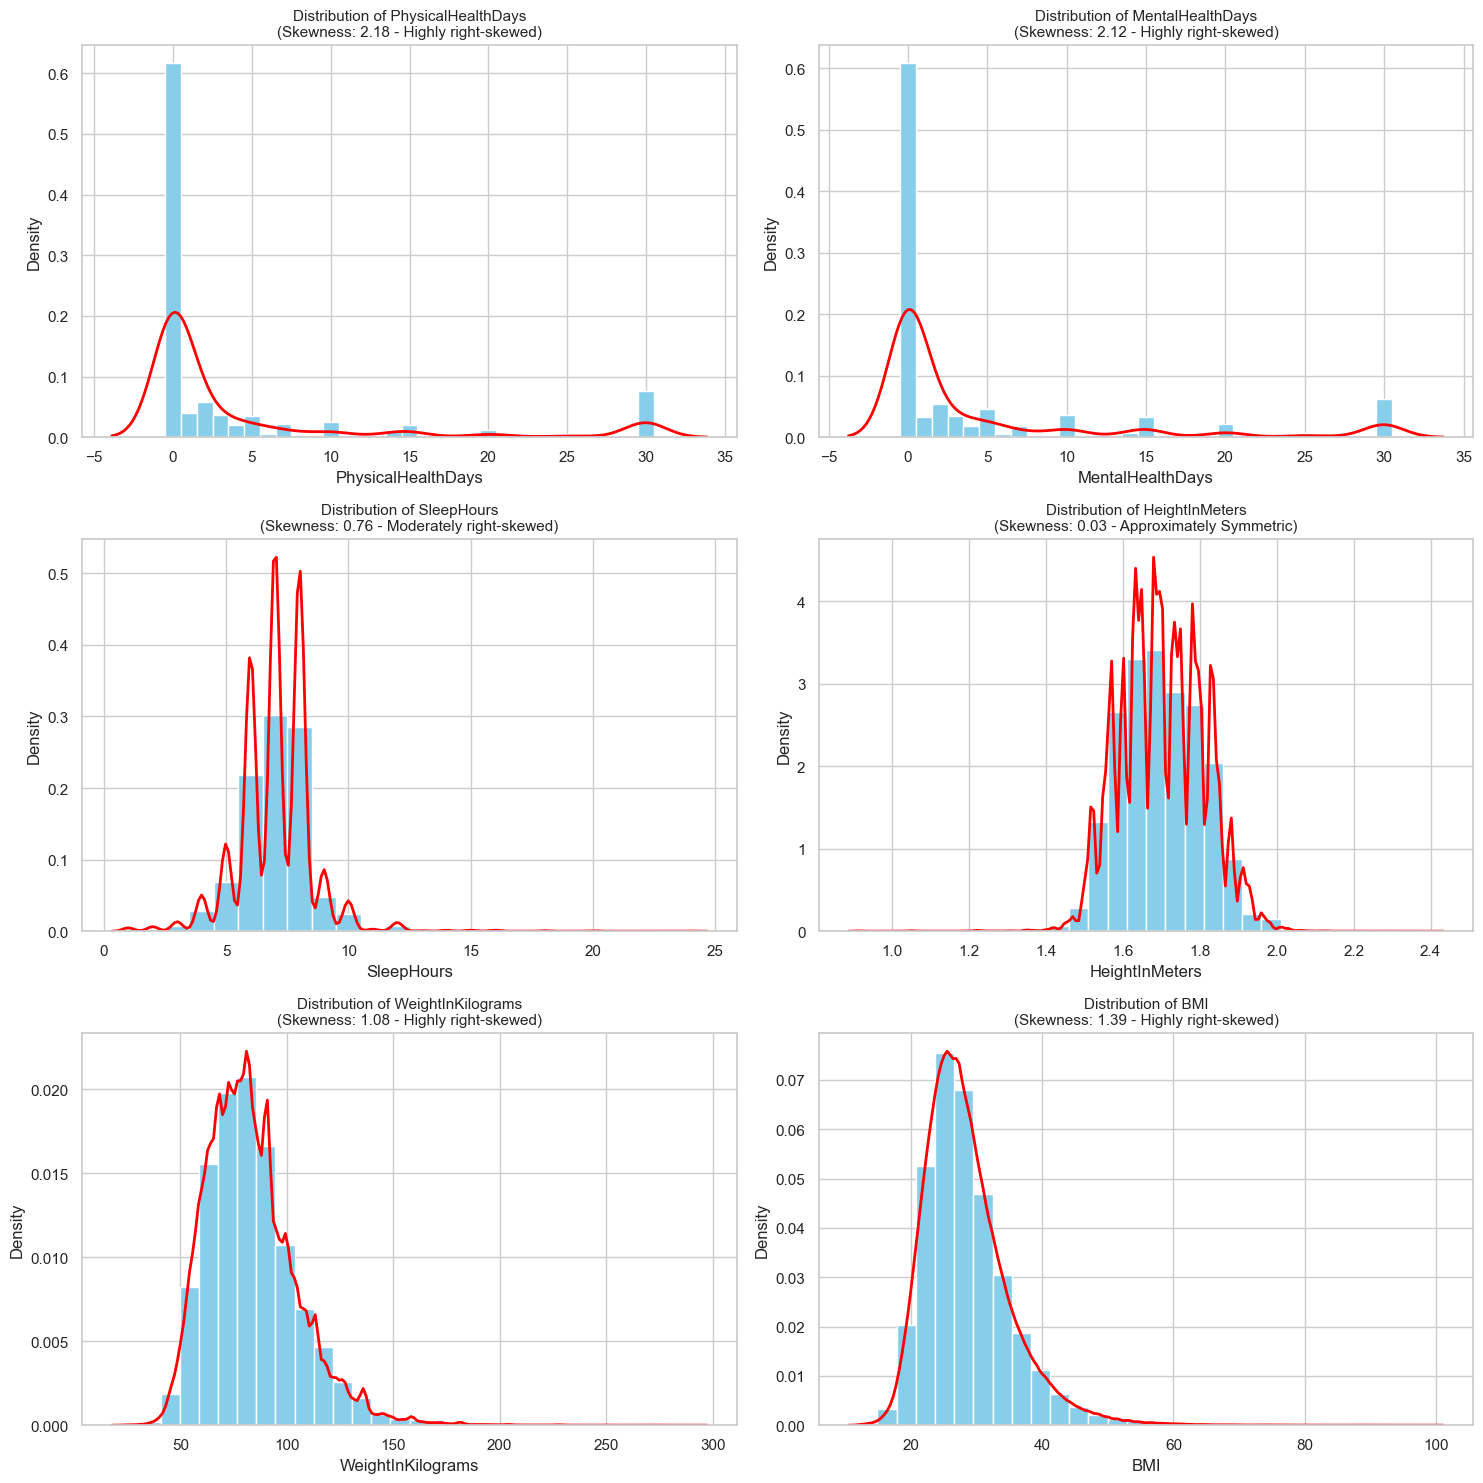

In [129]:
n_cols = 2
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  
distribution_shapes = {}

for i, col in enumerate(numerical_columns):
    # Setup Data
    data = df[col].dropna()
    
    
    if len(data) == 0:
        fig.delaxes(axes[i]) 
        continue
    
    # Calculate Skewness
    skew_val = data.skew()
    
    # Determine Shape String
    if skew_val > 1:
        shape_desc = "Highly right-skewed"
    elif skew_val < -1:
        shape_desc = "Highly left-skewed"
    elif 0.5 < skew_val <= 1:
        shape_desc = "Moderately right-skewed"
    elif -1 <= skew_val < -0.5:
        shape_desc = "Moderately left-skewed"
    else:
        shape_desc = "Approximately Symmetric"
    

    distribution_shapes[col] = shape_desc
    
    ax = axes[i] 
    
    is_discrete = data.nunique() <= 50
    
    if is_discrete:
        # For discrete data: set ax=ax
        sns.histplot(data, stat="density", discrete=True, color='skyblue', alpha=1.0, kde=False, edgecolor='white', ax=ax)
        sns.kdeplot(data, color='red', linewidth=2, bw_adjust=2.0, ax=ax)
    else:
        # For continuous data: set ax=ax
        sns.histplot(data, stat="density", bins=30, color='skyblue', alpha=1.0, kde=False, edgecolor='white', ax=ax)
        sns.kdeplot(data, color='red', linewidth=2, ax=ax)
    
    ax.set_title(f'Distribution of {col}\n(Skewness: {skew_val:.2f} - {shape_desc})', fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

df_numerical_des.loc['dis_shape'] = pd.Series(distribution_shapes)


### ANALYSIS OF GRAPH MEANINGS

#### 1. **PhysicalHealthDays** (Poor Physical Health Days - Skewness: 2.18)
- **STRONGLY RIGHT-SKEWED**: The majority of survey participants had 0 days of impaired physical health
- **Positive finding**: ~60% of the sample has good physical health (0 sick days)
- **High-risk group**: A small minority reported 30 continuous days of health impairment
- **Medical significance**: This is a positive sign for public health

#### 2. **MentalHealthDays** (Poor Mental Health Days - Skewness: 2.12)  
- **Similar to PhysicalHealthDays**: Most participants have good mental health
- **Notable point**: The rate of 0 affected days is also very high (~60%)
- **Potential correlation**: There may be a link to cardiovascular health

#### 3. **SleepHours** (Sleep Hours - Skewness: 0.76)
- **NEAR-NORMAL DISTRIBUTION**: Moderately right-skewed, centered around 6-8 hours
- **Peak**: The majority sleep 7-8 hours/night (medical recommendation)
- **Issue**: There is a group sleeping too little (<6h) and a group sleeping too much (>9h)
- **Risk factor**: Both sleep deprivation and oversleeping are linked to heart disease

#### 4. **HeightInMeters** (Height - Skewness: 0.03)
- **PERFECTLY SYMMETRICAL DISTRIBUTION**: Almost a normal distribution
- **Concentration**: 1.6-1.8m (consistent with adult population)
- **Significance**: This variable is stable for calculating BMI

#### 5. **WeightInKilograms** (Weight - Skewness: 1.08)
- **STRONGLY RIGHT-SKEWED**: Many people have normal weight, few have severe obesity
- **Distribution**: Concentrated at 60-90kg, with a "tail" extending to 150kg+
- **Obesity concern**: Outliers above 120kg 
- **BMI implication**: Will affect BMI distribution

#### 6. **BMI** (Body Mass Index - Skewness: 1.39)
- **STRONGLY RIGHT-SKEWED**: Inherited from the weight distribution
- **Cardiovascular risk**: High BMI is a major risk factor for heart disease
- **Intervention needed**: The group with BMI >35 requires special monitoring


* **Draw countplot to analyze the outliers** 

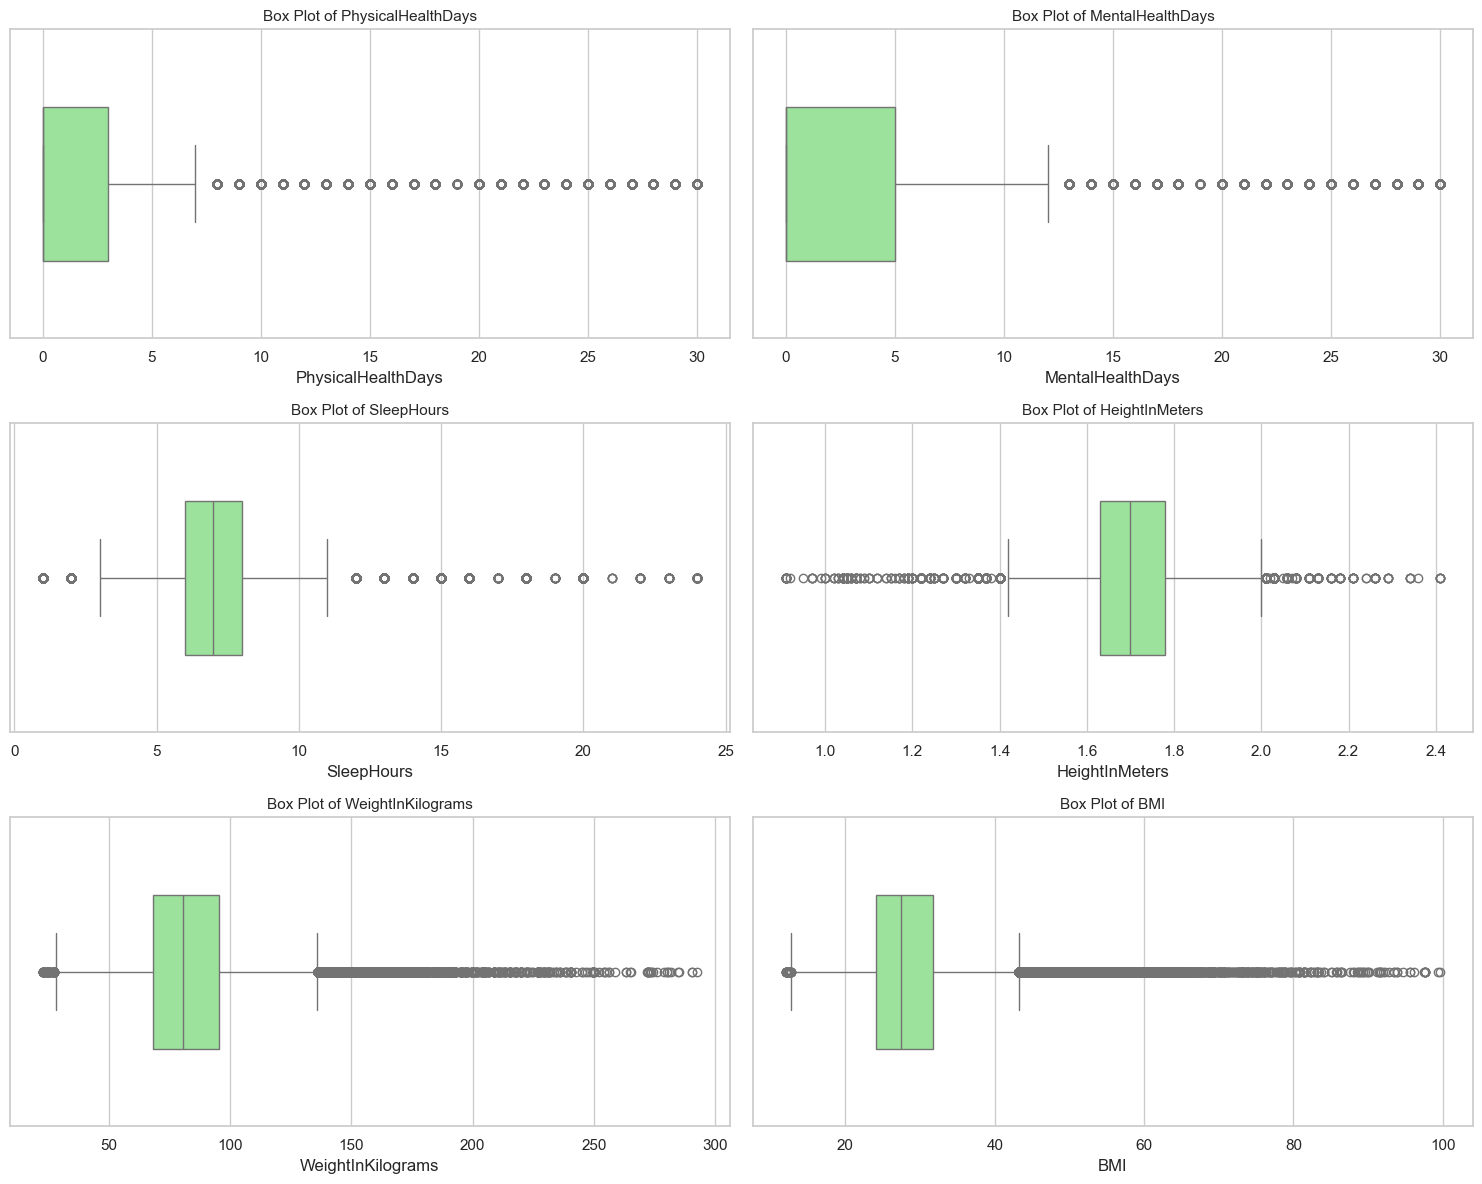

In [130]:
n_cols = 2 
n_rows = math.ceil(len(numerical_columns) / n_cols)


fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    
    # Setup Data
    data = df[col].dropna()
    
    if len(data) == 0:
        ax.text(0.5, 0.5, "No Data", ha='center', va='center')
        continue
        
    sns.boxplot(x=data, ax=ax, color='lightgreen', width=0.5)
    
    ax.set_title(f'Box Plot of {col}', fontsize=11)
    ax.set_xlabel(col)

for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outlier Analysis by Column

* **PhysicalHealthDays:** Outliers represent a continuous stream of values ranging from approximately *8 days up to 30 days*.
* **MentalHealthDays:** Outliers are concentrated on the higher end, ranging from roughly *13 days to 30 days*.
* **SleepHours:** Two-sided outliers. There are sparse outliers below *4 hours* and a long tail of outliers above *12 hours* (extending to 24).
* **HeightInMeters:** Two-sided outliers. Distinct outliers exist for short stature (< *1.4m*) and tall stature (> *2.0m*).
* **WeightInKilograms:**  A massive, dense cluster of outliers exists above *140kg*, extending up to approximately *290kg*.
* **BMI:** Heavily right-skewed. Significant high-value outliers begin above *43* and extend to *100*.

#### Conducting the table including:
- The distribution shape (normal, skewed, bimodal, uniform) 
- Calculate: mean, median, standard deviation 

In [131]:
df_numerical_des

PhysicalHealthDays     MentalHealthDays               SleepHours           HeightInMeters    WeightInKilograms                  BMI
count                 434053.0             435913.0                 439527.0                 416470.0             403044.0             396316.0
mean                      4.35                 4.38                     7.02                      1.7                83.07                28.53
std                       8.69                 8.39                      1.5                     0.11                21.45                 6.55
min                        0.0                  0.0                      1.0                     0.91                22.68                12.02
25%                        0.0                  0.0                      6.0                     1.63                68.04                24.13
50%                        0.0                  0.0                      7.0                      1.7                80.74                27.44
75%                        3.0                  5.0                      8.0                     1.78                95.25                31.75
max                       30.0                 30.0                     24.0                     2.41               292.57                99.64
dis_shape  Highly right-skewed  Highly right-skewed  Moderately right-skewed  Approximately Symmetric  Highly right-skewed  Highly right-skewed

### Range & Outliers: 
- What are the minimum and maximum values? 
- Are min/max values reasonable, or do they indicate errors? 
- Identify outliers using box plots, IQR method, or z-scores 
- Are outliers genuine extreme values or data entry errorissing

In [132]:
REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30, "days/month"),
    'MentalHealthDays':   (0, 30, "days/month"),
    'SleepHours':         (1, 24, "hours/day"),
    'HeightInMeters':     (0.5, 2.8, "meters"),
    'WeightInKilograms':  (25, 640, "kg"),
    'BMI':                (10, 150, "index")
}

summary_rows = []

for col in numerical_columns:
    data = df[col].dropna()
    if len(data) == 0:
        continue

    min_val = data.min()
    max_val = data.max()
    

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    low_outliers = data[data < lower_bound]
    high_outliers = data[data > upper_bound]
    total_outliers = len(low_outliers) + len(high_outliers)
    pct_outliers = (total_outliers / len(data)) * 100
    
    limit_info = REAL_LIFE_LIMITS.get(col)
    
    verdict = "Normal Distribution" # Mặc định
    note = ""
    
    if len(high_outliers) > 0:
        if limit_info:
            real_min, real_max, unit = limit_info
            
            # Logic so sánh với giới hạn thực tế
            if max_val <= real_max:
                verdict = "Genuine Extreme"
            else:
                verdict = "Data Error"
        else:
            verdict = "Statistical Outlier (No Limit Info)"
    elif len(low_outliers) > 0:
         verdict = "Statistical Outlier (Low)"

    # 4. Lưu vào dictionary
    row = {
        'Column': col,
        'Min': min_val,
        'Max': max_val,
        'IQR_Lower': lower_bound,
        'IQR_Upper': upper_bound,
        'Outliers_Low': len(low_outliers),
        'Outliers_High': len(high_outliers),
        'Total_Outliers_Pct': f"{pct_outliers:.2f}%",
        'Real_Limit_Max': limit_info[1] if limit_info else None,
        'Unit': limit_info[2] if limit_info else None,
        'Verdict': verdict,
    }
    summary_rows.append(row)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)    
df_outlier_analysis = pd.DataFrame(summary_rows)
df_outlier_analysis

Column    Min     Max  IQR_Lower  IQR_Upper  Outliers_Low  Outliers_High Total_Outliers_Pct  Real_Limit_Max        Unit          Verdict
0  PhysicalHealthDays   0.00   30.00      -4.50       7.50             0          72268             16.65%            30.0  days/month  Genuine Extreme
1    MentalHealthDays   0.00   30.00      -7.50      12.50             0          60389             13.85%            30.0  days/month  Genuine Extreme
2          SleepHours   1.00   24.00       3.00      11.00          2703           4557              1.65%            24.0   hours/day  Genuine Extreme
3      HeightInMeters   0.91    2.41       1.40       2.01           659            897              0.37%             2.8      meters  Genuine Extreme
4   WeightInKilograms  22.68  292.57      27.23     136.06            51           9592              2.39%           640.0          kg  Genuine Extreme
5                 BMI  12.02   99.64      12.70      43.18            45          12294              3.11%           150.0       index  Genuine Extreme

#### Data Quality: 
- What percentage of values are missing? 
- Are there any impossible values? (e.g., negative ages, prices = 0) 
- Are there placeholder values? (e.g., 999, -1, 0 used to indicate missing) 

In [133]:
SUSPICIOUS_PLACEHOLDERS = [-1, -9, -99, -999, 999, 9999, 0]
REAL_LIFE_LIMITS = {
    'PhysicalHealthDays': (0, 30),
    'MentalHealthDays':   (0, 30),
    'SleepHours':         (0, 24),
    'HeightInMeters':     (0.3, 3.0),
    'WeightInKilograms':  (20, 650),
    'BMI':                (10, 150)
}

quality_report_rows = []

for col in numerical_columns:
    # 1. Setup Data
    data_all = df[col]
    data_clean = df[col].dropna()
    total_len = len(data_all)
    
    if len(data_clean) == 0:
        continue

    # --- A. Missing Values ---
    missing_count = data_all.isnull().sum()
    missing_pct = (missing_count / total_len) * 100
    
    # --- B. Impossible Values (Real-world limits) ---
    min_limit, max_limit = REAL_LIFE_LIMITS.get(col, (None, None))
    imp_low_count = 0
    imp_high_count = 0
    imp_values_detail = ""
    
    if min_limit is not None:
        imp_low = data_clean[data_clean < min_limit]
        imp_low_count = len(imp_low)
        imp_high = data_clean[data_clean > max_limit]
        imp_high_count = len(imp_high)
        
        if imp_low_count > 0:
            imp_values_detail += f"Low({imp_low_count}): {imp_low.iloc[:3].tolist()}... "
        if imp_high_count > 0:
            imp_values_detail += f"High({imp_high_count}): {imp_high.nlargest(3).tolist()}..."

    total_impossible = imp_low_count + imp_high_count
    
    found_placeholders = []
    for p in SUSPICIOUS_PLACEHOLDERS:
        count = (data_clean == p).sum()
        if count > 0:
            pct = (count / len(data_clean)) * 100
            found_placeholders.append(f"{p} ({pct:.1f}%)")
            
    placeholders_str = ", ".join(found_placeholders) if found_placeholders else "None"
    
    zero_pct = ((data_clean == 0).sum() / len(data_clean)) * 100

    issues = []
    if missing_pct > 5:
        issues.append("High Missing Rate")
    if total_impossible > 0:
        issues.append("Impossible Values")
    if len(found_placeholders) > 0:
        issues.append("Suspicious Placeholders")
    if zero_pct > 10 and 0 in SUSPICIOUS_PLACEHOLDERS:
        issues.append("High Zero Rate")
        
    verdict = ", ".join(issues) if issues else "Good Quality"

    row = {
        'Column': col,
        'Missing_Pct': f"{missing_pct:.2f}%",
        'Limit_Range': f"[{min_limit}-{max_limit}]" if min_limit else "N/A",
        'Impossible_Count': total_impossible,
        'Impossible_Examples': imp_values_detail if imp_values_detail else "None",
        'Sus_Placeholders': placeholders_str,
        'Zero_Pct': f"{zero_pct:.1f}%",
        'Quality_Verdict': verdict
    }
    quality_report_rows.append(row)

df_quality_report = pd.DataFrame(quality_report_rows)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

df_quality_report

Column Missing_Pct Limit_Range  Impossible_Count Impossible_Examples Sus_Placeholders Zero_Pct                          Quality_Verdict
0  PhysicalHealthDays       2.45%         N/A                 0                None        0 (61.7%)    61.7%  Suspicious Placeholders, High Zero Rate
1    MentalHealthDays       2.04%         N/A                 0                None        0 (60.8%)    60.8%  Suspicious Placeholders, High Zero Rate
2          SleepHours       1.22%         N/A                 0                None             None     0.0%                             Good Quality
3      HeightInMeters       6.41%   [0.3-3.0]                 0                None             None     0.0%                        High Missing Rate
4   WeightInKilograms       9.42%    [20-650]                 0                None             None     0.0%                        High Missing Rate
5                 BMI      10.94%    [10-150]                 0                None             None     0.0%                        High Missing Rate

## III.6 Categorical columns analysis 

###  Finding all categorical columns

In [134]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns detected: {categorical_columns}")


Categorical columns detected: ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


### Value Distribution: 


- How many unique/distinct values are there? 
- What are the top 5-10 most frequent values?
- Is the distribution balanced or highly imbalanced? 

In [135]:
CATEGORY_LABEL_MAPS = {
    'LastCheckupTime': {
        'Within past year (anytime less than 12 months ago)': '< 1 year',
        'Within past 2 years (1 year but less than 2 years ago)': '1-2 years',
        'Within past 5 years (2 years but less than 5 years ago)': '2-5 years',
        '5 or more years ago': '5+ years',
        'Never': 'Never'
    },
    'RemovedTeeth': {
        'None of them': 'None',
        '1 to 5': '1-5',
        '6 or more, but not all': '6+ but not all',
        'All': 'All'
    }
   
}

def get_short_labels(col_name, labels):
    mapping = CATEGORY_LABEL_MAPS.get(col_name, {})
    new_labels = []
    for label in labels:
        str_label = str(label)
        if str_label in mapping:
            new_labels.append(mapping[str_label])
        else:
            new_labels.append(str_label[:15] + '...' if len(str_label) > 15 else str_label)
    return new_labels

In [136]:
stats_rows = []

for col in categorical_columns:
    # 1. Vectorized basic statistics
    col_data = df[col].values
    is_missing = pd.isna(col_data)
    total_values = len(col_data)
    non_missing_mask = ~is_missing
    non_missing_data = col_data[non_missing_mask]
    
    # Fast unique count
    unique_count = df[col].nunique()
    
    # 2. Top Values Analysis
    top_values = df[col].value_counts().head(10)
    
    top_values_list = [
        f"{val} ({cnt:,} | {cnt/total_values:.1%})" 
        for val, cnt in top_values.items()
    ]

    # 3. Distribution Balance (Gini)
    proportions = top_values / total_values
    most_freq_pct = np.max(proportions) * 100
    gini = 1 - np.sum(proportions ** 2)
    
    if most_freq_pct > 90: status = "Extremely imbalanced"
    elif most_freq_pct > 70: status = "Highly imbalanced"
    elif most_freq_pct > 50: status = "Moderately imbalanced"
    else: status = "Relatively balanced"

    # Lưu vào danh sách
    row = {
        'Column': col,
        'Unique': unique_count,
        'Top_Values': " , ".join(top_values_list),
        'Balance_Status': status,
        'Gini_Score': f"{gini:.3f}"
    }
    stats_rows.append(row)

df_cat_info = pd.DataFrame(stats_rows)

pd.set_option('display.max_colwidth', None)
styled_df = df_cat_info.style.set_properties(**{
    'text-align': 'left',       
    'white-space': 'pre-wrap',  
    'vertical-align': 'top'    
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')] 
}])
styled_df

- Create visualizations: bar charts, count plots 

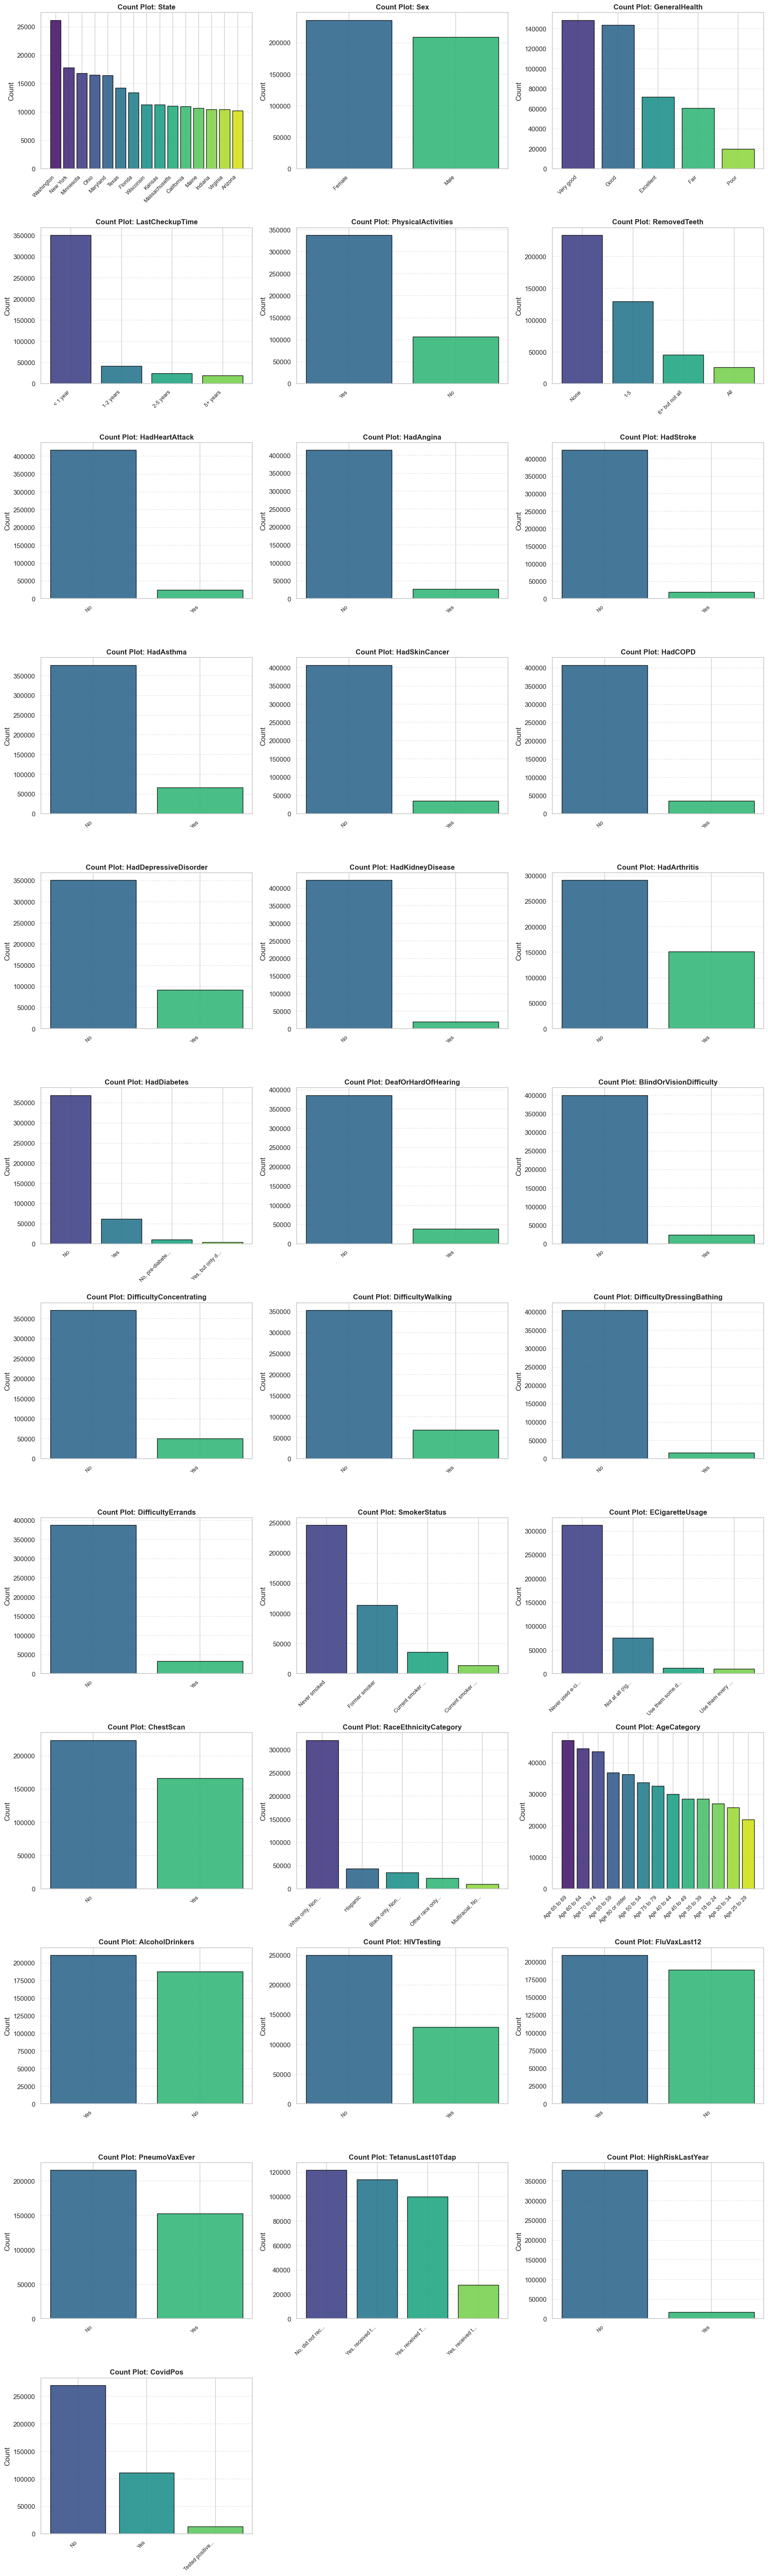

In [137]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Prepare Data
    col_data = df[col].dropna().values
    unique_vals, counts = np.unique(col_data, return_counts=True)
    
    # Sort descending
    sort_idx = np.argsort(-counts)
    max_cats = min(15, len(unique_vals)) 
    plot_vals = unique_vals[sort_idx[:max_cats]]
    plot_counts = counts[sort_idx[:max_cats]]
    
    # Get Short Labels
    short_labels = get_short_labels(col, plot_vals)
    
    # Bạn có thể thay 'viridis' bằng: 'husl', 'Spectral', 'coolwarm', 'magma'
    colors = sns.color_palette("viridis", len(plot_counts))
    
    ax.bar(range(len(plot_counts)), plot_counts, color=colors, alpha=0.9, edgecolor='black')
    # ------------------------------
    ax.set_xticks(range(len(short_labels)))
    ax.set_xticklabels(short_labels, rotation=45, ha='right', fontsize=9)
    ax.set_title(f'Count Plot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.5)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

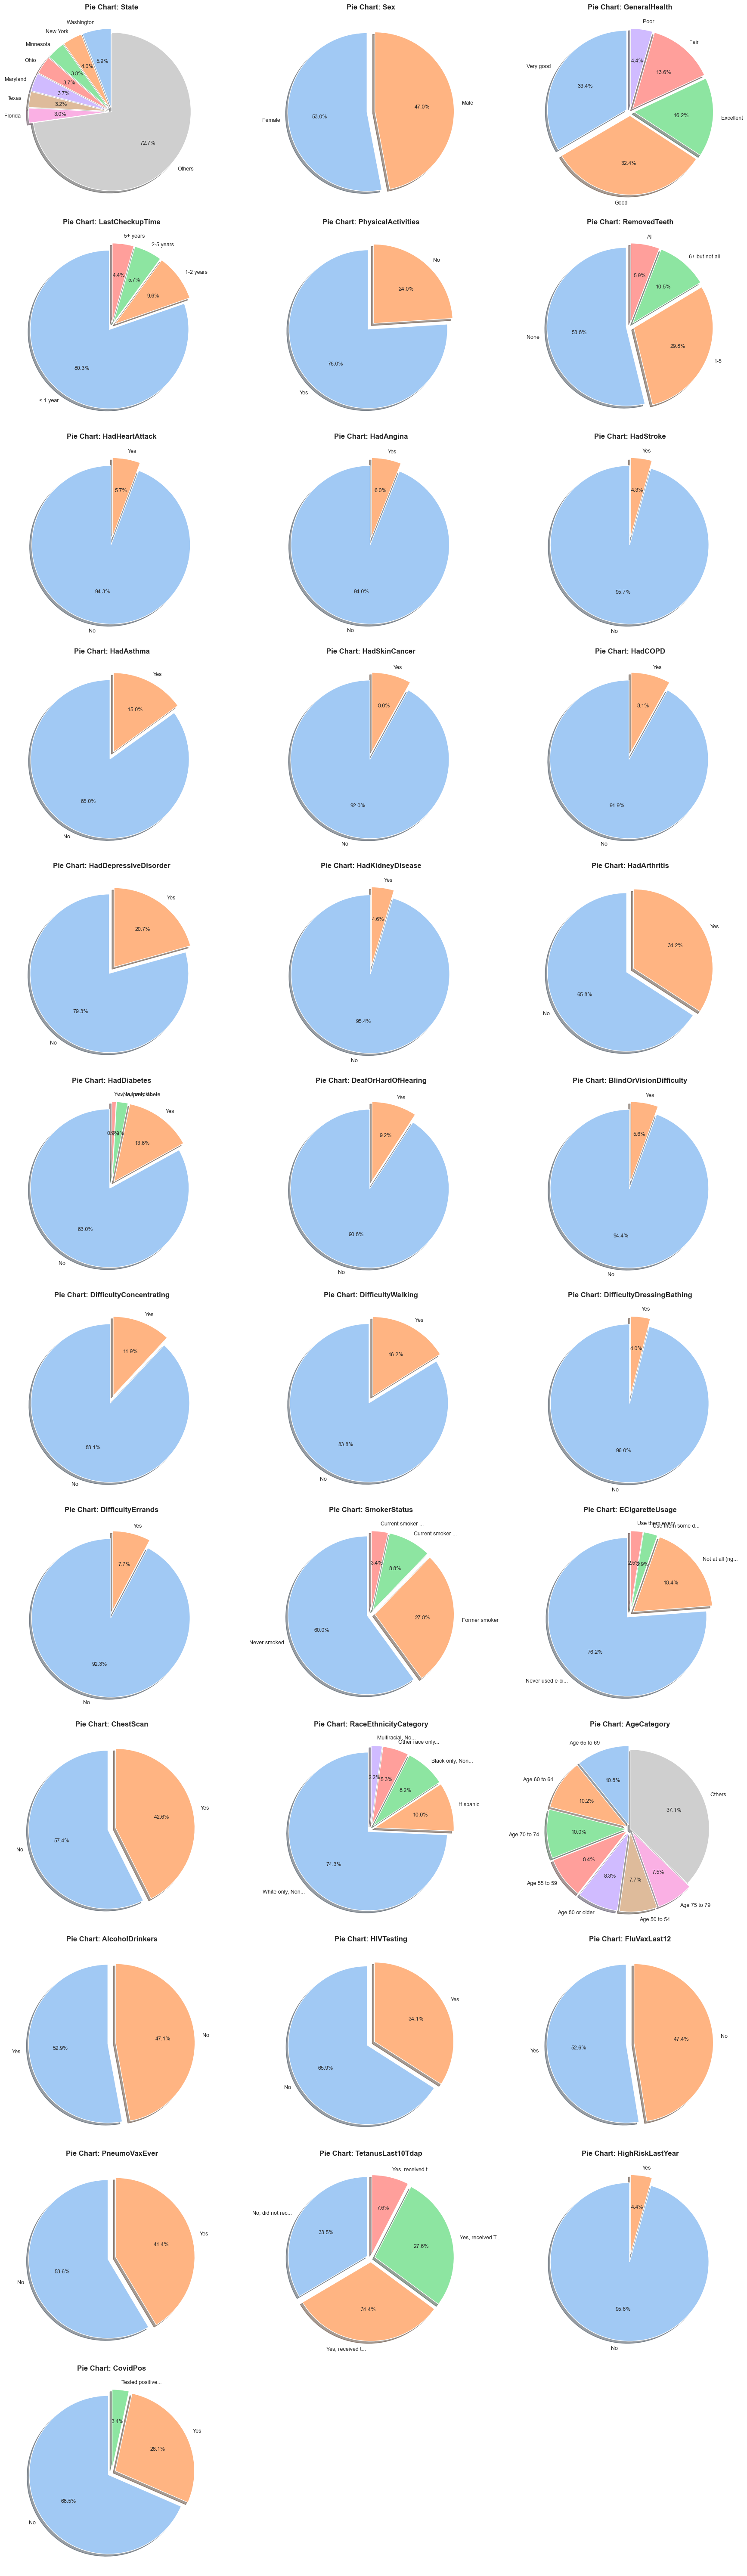

In [138]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # Prepare Data
    col_data = df[col].dropna().values
    unique_vals, counts = np.unique(col_data, return_counts=True)
    sort_idx = np.argsort(-counts) # Descending
    
    sorted_vals = unique_vals[sort_idx]
    sorted_counts = counts[sort_idx]
    
    # Logic for "Others" grouping
    if len(sorted_vals) <= 8:
        pie_labels = get_short_labels(col, sorted_vals)
        pie_counts = sorted_counts
        explode = [0.05] * len(sorted_vals) 
    else:
        # Group Top 7 + Others
        top_7_vals = sorted_vals[:7]
        top_7_counts = sorted_counts[:7]
        others_count = np.sum(sorted_counts[7:])
        
        pie_labels = get_short_labels(col, top_7_vals) + ['Others']
        pie_counts = np.append(top_7_counts, others_count)
        explode = [0.05] * 7 + [0] 

    colors = sns.color_palette('pastel', len(pie_counts))
    
    # Plot Pie Chart
    ax.pie(pie_counts, 
           labels=pie_labels, 
           autopct='%1.1f%%', 
           startangle=90, 
           explode=explode, 
           shadow=True,
           colors=colors,  
           textprops={'fontsize': 9},
           wedgeprops={'edgecolor': 'white', 'linewidth': 1})
    
    ax.set_title(f'Pie Chart: {col}', fontsize=12, fontweight='bold')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Data Quality: 
<ol>
    <li> What percentage of values are missing? 
    <li> Are there inconsistencies in categories?(Example: "Male", "male", "M", "m" all meaning the same thing, Typos or variations in spelling)
    <li> Are there unexpected or abnormal values? 
    <li> Are there categories with very few observations? Should they be grouped?
<ol>

In [139]:
quality_rows = []

for col in categorical_columns:
    # 1. Setup Data
    col_data = df[col]
    total_count = len(col_data)
    non_missing = col_data.dropna()
    missing_count = col_data.isnull().sum()
    
    # --- A. Missing Values Analysis ---
    missing_pct = (missing_count / total_count) * 100
    
    if missing_pct == 0: missing_qual = "Excellent"
    elif missing_pct < 5: missing_qual = "Good"
    elif missing_pct < 15: missing_qual = "Moderate"
    else: missing_qual = "Poor"

    # --- B. Inconsistency Detection ---
    if len(non_missing) > 0:
        unique_values = non_missing.unique()
        normalized_groups = defaultdict(list)
        
        for value in unique_values:
            # Normalize: lowercase, alphanumeric only
            normalized = re.sub(r'[^a-zA-Z0-9]', '', str(value).lower().strip())
            normalized_groups[normalized].append(str(value))
        
        # Count groups with variants > 1
        inconsistencies = [variants for k, variants in normalized_groups.items() if len(variants) > 1]
        inconsistency_count = len(inconsistencies)
    else:
        unique_values = []
        inconsistency_count = 0

    # --- C. Abnormal Values ---
    abnormal_patterns = []
    if len(unique_values) > 0:
        # Check numeric-like codes
        num_like = [v for v in unique_values if str(v).isdigit() and len(str(v)) > 2]
        if num_like: abnormal_patterns.append("Numeric Codes")
        
        # Check very long strings
        long_str = [v for v in unique_values if len(str(v)) > 50]
        if long_str: abnormal_patterns.append("Long Strings (>50)")
        
        # Check special chars
        spec_chars = [v for v in unique_values if re.search(r'[^\w\s\-\(\)\/\.]', str(v))]
        if spec_chars: abnormal_patterns.append("Special Chars")
    
    abnormal_str = ", ".join(abnormal_patterns) if abnormal_patterns else "None"

    # --- D. Rare Categories ---
    if len(non_missing) > 0:
        val_counts = non_missing.value_counts()
        rare_threshold = 0.01
        rare_cats = val_counts[val_counts / len(non_missing) < rare_threshold]
        rare_count = len(rare_cats)
        rare_pct_total = (rare_cats.sum() / len(non_missing)) * 100
    else:
        rare_count = 0
        rare_pct_total = 0
    
    # Solutions
    solutions = []
    if missing_pct > 5: solutions.append("Impute Missing")
    if inconsistency_count > 0: solutions.append("Standardize Names")
    if abnormal_patterns: solutions.append("Clean Abnormal Values")
    if rare_count > 10: solutions.append("Group Rare Cats")
    
    sol_str = ", ".join(solutions) if solutions else "None"

    # --- F. Save Row ---
    row = {
        'Column': col,
        'Missing': f"{missing_pct:.1f}% ({missing_qual})",
        'Inconsistencies': f"{inconsistency_count} groups" if inconsistency_count > 0 else "None",
        'Abnormal_Issues': abnormal_str,
        'Rare_Categories': f"{rare_count} cats ({rare_pct_total:.1f}% data)",
        'Actions_Needed': sol_str
    }
    quality_rows.append(row)

# Create DataFrame
df_data_quality = pd.DataFrame(quality_rows)

# Visualization
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
df_data_quality

Column           Missing Inconsistencies                    Abnormal_Issues      Rare_Categories                         Actions_Needed
0                       State  0.0% (Excellent)            None                               None  10 cats (7.8% data)                                   None
1                         Sex  0.0% (Excellent)            None                               None   0 cats (0.0% data)                                   None
2               GeneralHealth       0.3% (Good)            None                               None   0 cats (0.0% data)                                   None
3             LastCheckupTime       1.9% (Good)            None                 Long Strings (>50)   0 cats (0.0% data)                  Clean Abnormal Values
4          PhysicalActivities       0.2% (Good)            None                               None   0 cats (0.0% data)                                   None
5                RemovedTeeth       2.6% (Good)            None                      Special Chars   0 cats (0.0% data)                  Clean Abnormal Values
6              HadHeartAttack       0.7% (Good)            None                               None   0 cats (0.0% data)                                   None
7                   HadAngina       1.0% (Good)            None                               None   0 cats (0.0% data)                                   None
8                   HadStroke       0.3% (Good)            None                               None   0 cats (0.0% data)                                   None
9                   HadAsthma       0.4% (Good)            None                               None   0 cats (0.0% data)                                   None
10              HadSkinCancer       0.7% (Good)            None                               None   0 cats (0.0% data)                                   None
11                    HadCOPD       0.5% (Good)            None                               None   0 cats (0.0% data)                                   None
12      HadDepressiveDisorder       0.6% (Good)            None                               None   0 cats (0.0% data)                                   None
13           HadKidneyDisease       0.4% (Good)            None                               None   0 cats (0.0% data)                                   None
14               HadArthritis       0.6% (Good)            None                               None   0 cats (0.0% data)                                   None
15                HadDiabetes       0.2% (Good)            None                      Special Chars   1 cats (0.9% data)                  Clean Abnormal Values
16        DeafOrHardOfHearing       4.6% (Good)            None                               None   0 cats (0.0% data)                                   None
17    BlindOrVisionDifficulty       4.8% (Good)            None                               None   0 cats (0.0% data)                                   None
18    DifficultyConcentrating   5.4% (Moderate)            None                               None   0 cats (0.0% data)                         Impute Missing
19          DifficultyWalking   5.4% (Moderate)            None                               None   0 cats (0.0% data)                         Impute Missing
20  DifficultyDressingBathing   5.3% (Moderate)            None                               None   0 cats (0.0% data)                         Impute Missing
21          DifficultyErrands   5.7% (Moderate)            None                               None   0 cats (0.0% data)                         Impute Missing
22               SmokerStatus   7.9% (Moderate)            None                               None   0 cats (0.0% data)                         Impute Missing
23            ECigaretteUsage   8.0% (Moderate)            None                               None   0 cats (0.0% data)                         Impute Missing
24                  ChestScan  12.6% (Moderate) 

There're 2 columns with rare categories which mean it's less observation. Which is `State` and `HadDiabetes`.

In the case of `State` we decided not to group it, as it's indiviual state and doesn't effect the statiscal report or model training in below sections

On the other hand, `HadDiabetes` effect greatly to our statsical report and model training, due to the fact it's a critical indicator of Heart Disease. So we decided to group it, after looking. There're 4 unique values of this columns (which we've analyse above). So we grouped it so there'll be only 2 values "yes" and "no"

## III.7. Missing value analysis

### Overall Assessment: 

Create a missing values summary: column name, count, and percentage missing 

In [140]:
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Total_Count': len(df),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
missing_summary = missing_summary.reset_index(drop=True)
missing_summary

Column  Missing_Count  Total_Count  Missing_Percentage
0               GeneralHealth           1193       444975                0.27
1          PhysicalHealthDays          10922       444975                2.45
2            MentalHealthDays           9062       444975                2.04
3             LastCheckupTime           8301       444975                1.87
4          PhysicalActivities           1088       444975                0.24
5                  SleepHours           5448       444975                1.22
6                RemovedTeeth          11355       444975                2.55
7              HadHeartAttack           3060       444975                0.69
8                   HadAngina           4400       444975                0.99
9                   HadStroke           1552       444975                0.35
10                  HadAsthma           1768       444975                0.40
11              HadSkinCancer           3138       444975                0.71
12                    HadCOPD           2214       444975                0.50
13      HadDepressiveDisorder           2807       444975                0.63
14           HadKidneyDisease           1921       444975                0.43
15               HadArthritis           2628       444975                0.59
16                HadDiabetes           1082       444975                0.24
17        DeafOrHardOfHearing          20502       444975                4.61
18    BlindOrVisionDifficulty          21419       444975                4.81
19    DifficultyConcentrating          24095       444975                5.41
20          DifficultyWalking          23867       444975                5.36
21  DifficultyDressingBathing          23770       444975                5.34
22          DifficultyErrands          25511       444975                5.73
23               SmokerStatus          35316       444975                7.94
24            ECigaretteUsage          35514       444975                7.98
25                  ChestScan          55900       444975               12.56
26      RaceEthnicityCategory          14048       444975                3.16
27                AgeCategory           9069       444975                2.04
28             HeightInMeters          28505       444975                6.41
29          WeightInKilograms          41931       444975                9.42
30                        BMI          48659       444975               10.94
31            AlcoholDrinkers          46428       444975               10.43
32                 HIVTesting          65981       444975               14.83
33               FluVaxLast12          46975       444975               10.56
34              PneumoVaxEver          76894       444975               17.28
35          TetanusLast10Tdap          82370       444975               18.51
36           HighRiskLastYear          50477       444975               11.34
37                   CovidPos          50618       444975               11.38

Visualize missing data patterns (heatmap or bar chart) 

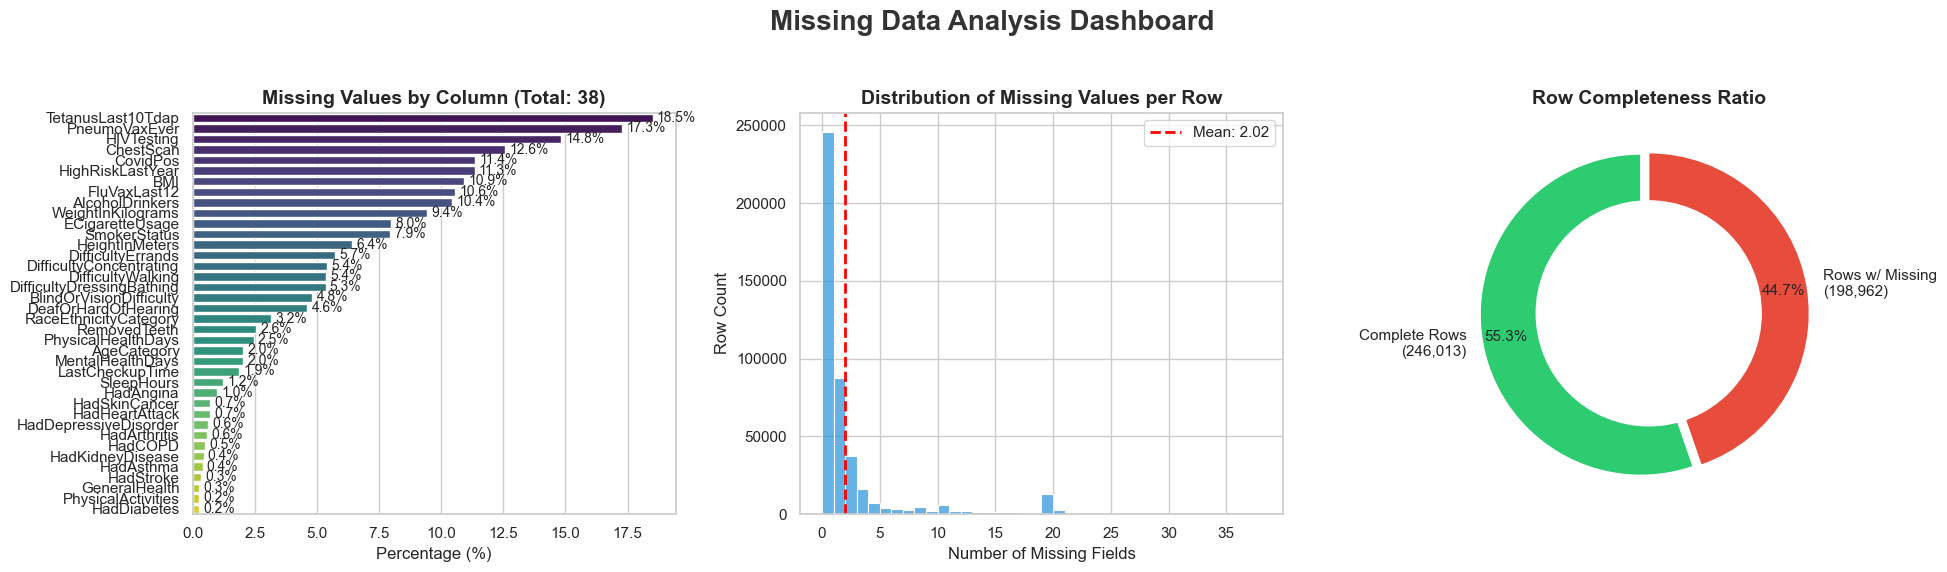

In [141]:
# 1. Cấu hình Style
sns.set_theme(style="whitegrid", context="notebook")

# 2. Chuẩn bị dữ liệu
plot_data = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
missing_per_row = df.isnull().sum(axis=1)

# 3. Khởi tạo khung hình: 1 Dòng, 3 Cột (Bỏ Heatmap, giữ lại 3 biểu đồ kia)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Tiêu đề lớn
plt.suptitle('Missing Data Analysis Dashboard', fontsize=20, fontweight='bold', color='#333333', y=0.98)

# Gán biến trục để dễ thao tác (ax1, ax2, ax3)
ax1, ax2, ax3 = axes.flatten()

# --- PLOT 1: Missing Values by Column (Bar Chart) ---
if not plot_data.empty:
    # FIX WARNING: Thêm hue='Column' và legend=False
    sns.barplot(data=plot_data, x='Missing_Percentage', y='Column', 
                ax=ax1, palette='viridis', hue='Column', legend=False)
    
    ax1.set_title(f'Missing Values by Column (Total: {len(plot_data)})', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Percentage (%)', fontsize=12)
    ax1.set_ylabel('')
    
    # Thêm nhãn số %
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)
else:
    ax1.text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)

# --- PLOT 2: Missing per Row (Histogram) ---
# (Chuyển Histogram từ vị trí số 3 cũ lên vị trí số 2)
if missing_per_row.sum() > 0:
    sns.histplot(missing_per_row, kde=False, ax=ax2, color='#3498db', binwidth=1, edgecolor='white')
    
    mean_val = missing_per_row.mean()
    ax2.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    ax2.set_title('Distribution of Missing Values per Row', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Number of Missing Fields', fontsize=12)
    ax2.set_ylabel('Row Count', fontsize=12)
    ax2.legend()
else:
    ax2.text(0.5, 0.5, 'All Rows Complete', ha='center', va='center', fontsize=14)

# --- PLOT 3: Row Completeness (Donut Chart) ---
# (Chuyển Donut từ vị trí số 4 cũ lên vị trí số 3)
complete_count = (missing_per_row == 0).sum()
incomplete_count = len(df) - complete_count

if incomplete_count > 0:
    labels = [f'Complete Rows\n({complete_count:,})', f'Rows w/ Missing\n({incomplete_count:,})']
    sizes = [complete_count, incomplete_count]
    colors = ['#2ecc71', '#e74c3c'] # Xanh lá vs Đỏ
    
    wedges, texts, autotexts = ax3.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                       startangle=90, colors=colors, pctdistance=0.85, 
                                       explode=(0.05, 0), textprops={'fontsize': 11})
    
    # Tạo vòng tròn trắng ở giữa để thành Donut Chart
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax3.add_artist(centre_circle)
    
    ax3.set_title('Row Completeness Ratio', fontsize=14, fontweight='bold')
else:
    ax3.text(0.5, 0.5, '100% Data Complete', ha='center', va='center', fontsize=14, color='green')
    ax3.axis('off')

# 4. Căn chỉnh layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Are missing values random, or is there a pattern?  
- Do certain rows or groups have more missing values?

In [142]:
 # 3. Analyze missing data patterns
total_missing_values = missing_summary['Missing_Count'].sum()
print("-" * 60)

# Check for patterns in missing values
print("Pattern Analysis:")

# Are missing values random or systematic?
if total_missing_values > 0:
    # Calculate missing value correlation
    missing_corr = df.isnull().corr()
    
    # Find highly correlated missing patterns (>0.5 correlation)
    high_corr_pairs = []
    for i in range(len(missing_corr.columns)):
        for j in range(i+1, len(missing_corr.columns)):
            corr_val = missing_corr.iloc[i, j]
            if abs(corr_val) > 0.5 and not np.isnan(corr_val):
                high_corr_pairs.append({
                    'col1': missing_corr.columns[i],
                    'col2': missing_corr.columns[j],
                    'correlation': corr_val
                })
    
    if high_corr_pairs:
        print("Strong correlations in missing patterns found:")
        for pair in high_corr_pairs:
            print(f"  - {pair['col1']} & {pair['col2']}: {pair['correlation']:.3f}")
        print("\nThis suggests SYSTEMATIC missing patterns (not random)")
    else:
        print("No strong correlations in missing patterns found")
        print("Missing values appear to be more RANDOM in nature")

    # Khả năng khá cao là random nhea, đếm strong corelation là 132 -> tổng số cặp correlation của missing column có thể có là 703 -> chỉ chiếm khoảng ~18.78% 
    # Các strong correlation khả năng cao là có pattern do là phone survey -> ví dụ hỏi bạn có ho không? nếu có thì mới hỏi bạn có sốt không, còn không thì bỏ luôn, từ cái này kéo theo cái kia.
    # Tổng quan lại phần lớn data sẽ là random.
    

    # Check if certain groups have more missing values
    print(f"\n4. GROUP-BASED MISSING PATTERNS")
    print("-" * 60)
    
    # Analyze missing patterns by key demographic variables
    demographic_cols = ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory']
    
    for col in demographic_cols:
        if col in df.columns and not df[col].isnull().all():
            print(f"\nMissing patterns by {col}:")
            
            # Calculate missing percentage by group
            group_missing = df.groupby(col)[missing_summary[missing_summary['Missing_Count'] > 0]['Column'].tolist()].apply(
                lambda x: x.isnull().sum() / len(x) * 100
            )
            
            if len(group_missing) > 0:
                # Show top 3 groups with most missing values
                total_missing_by_group = group_missing.sum(axis=1).sort_values(ascending=False)
                print(f"  Top 3 groups with most missing data:")
                for i, (group, missing_pct) in enumerate(total_missing_by_group.head(3).items()):
                    print(f"    {i+1}. {group}: {missing_pct:.1f}% average missing")
            else:
                print(f"  No missing patterns to analyze for {col}")

else:
    print("No missing values found in the dataset!")
    print("Data appears to be complete across all columns and rows.")

print("\n" + "=" * 80)

------------------------------------------------------------
Pattern Analysis:
Strong correlations in missing patterns found:
  - DeafOrHardOfHearing & BlindOrVisionDifficulty: 0.906
  - DeafOrHardOfHearing & DifficultyConcentrating: 0.849
  - DeafOrHardOfHearing & DifficultyWalking: 0.851
  - DeafOrHardOfHearing & DifficultyDressingBathing: 0.852
  - DeafOrHardOfHearing & DifficultyErrands: 0.821
  - DeafOrHardOfHearing & SmokerStatus: 0.690
  - DeafOrHardOfHearing & ECigaretteUsage: 0.688
  - DeafOrHardOfHearing & ChestScan: 0.537
  - DeafOrHardOfHearing & HeightInMeters: 0.718
  - DeafOrHardOfHearing & WeightInKilograms: 0.559
  - DeafOrHardOfHearing & BMI: 0.541
  - DeafOrHardOfHearing & AlcoholDrinkers: 0.595
  - DeafOrHardOfHearing & FluVaxLast12: 0.590
  - DeafOrHardOfHearing & HighRiskLastYear: 0.566
  - DeafOrHardOfHearing & CovidPos: 0.566
  - BlindOrVisionDifficulty & DifficultyConcentrating: 0.884
  - BlindOrVisionDifficulty & DifficultyWalking: 0.886
  - BlindOrVisionDiffi

### Per Column Strategy: 

* Why might values be missing? (random, not applicable, data collection issue) 
* What is your plan to handle them? (remove, impute, keep as separate category) 


In [143]:
# 1. Setup Data & Categories
columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0].copy()

column_categories = {
    'Demographics': ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory'],
    'Heart Conditions': ['HadHeartAttack', 'HadAngina', 'HadStroke'],
    'Physical Health Metrics': ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'BMI', 'HeightInMeters', 'WeightInKilograms'],
    'Chronic Conditions': ['HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'],
    'Disabilities': ['DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands'],
    'Lifestyle': ['SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours'],
    'Healthcare & Prevention': ['LastCheckupTime', 'RemovedTeeth', 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
}

## 2. Helper functions
def get_reasons(category):
    reasons = {
        "Demographics": "Privacy concerns; Data collection errors; Skip patterns",
        "Heart Conditions": "Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers",
        "Physical Health Metrics": "Measurement not taken; Equipment issues; Refusal",
        "Chronic Conditions": "Undiagnosed; Reluctance to disclose; Uncertainty",
        "Disabilities": "Sensitive topic; Interpretation issues; Not applicable",
        "Lifestyle": "Social desirability bias; Privacy concerns",
        "Healthcare & Prevention": "Recall bias (memory); Survey fatigue; Not applicable"
    }
    return reasons.get(category, "General non-response; Ambiguity; Random errors")

def get_impact_level(missing_pct):
    if missing_pct < 5: return "Low (Minimal bias risk)"
    elif missing_pct < 15: return "Moderate (Risk if dropped)"
    else: return "High (Major bias/data loss)"

# 3. Build the Report Data
strategy_rows = []

for idx, row in columns_with_missing.iterrows():
    col = row['Column']
    missing_count = row['Missing_Count']
    missing_pct = row['Missing_Percentage']
    
    # A. Determine Category
    category = "Uncategorized"
    for cat_name, cat_cols in column_categories.items():
        if col in cat_cols:
            category = cat_name
            break
            
    # B. Determine Data Type
    is_categorical = df[col].dtype == 'object'
    dtype_str = "Categorical" if is_categorical else "Numerical"
    
    # C. Get Reasons & Impact
    reason_text = get_reasons(category)
    impact_text = get_impact_level(missing_pct)
    
    # D. Current Value Context (Snapshot)
    if is_categorical:
        unique_vals = df[col].dropna().unique()
        context_str = f"{len(unique_vals)} unique values"
    else:
        min_v, max_v = df[col].min(), df[col].max()
        context_str = f"Range: {min_v:.1f} - {max_v:.1f}"

    # E. Append to list
    strategy_rows.append({
        'Column': col,
        'Category': category,
        'Data_Type': dtype_str,
        'Missing_Pct': f"{missing_pct:.2f}%",
        'Missing_Count': f"{missing_count:,}",
        'Likely_Reason': reason_text,
        'Impact_Level': impact_text
    })

# 4. Create DataFrame
df_missing_strategy = pd.DataFrame(strategy_rows)

# 5. Display Options (to see full text)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

df_missing_strategy

Column                 Category    Data_Type Missing_Pct Missing_Count                                                         Likely_Reason                 Impact_Level
0               GeneralHealth  Physical Health Metrics  Categorical       0.27%         1,193                      Measurement not taken; Equipment issues; Refusal      Low (Minimal bias risk)
1          PhysicalHealthDays  Physical Health Metrics    Numerical       2.45%        10,922                      Measurement not taken; Equipment issues; Refusal      Low (Minimal bias risk)
2            MentalHealthDays  Physical Health Metrics    Numerical       2.04%         9,062                      Measurement not taken; Equipment issues; Refusal      Low (Minimal bias risk)
3             LastCheckupTime  Healthcare & Prevention  Categorical       1.87%         8,301                  Recall bias (memory); Survey fatigue; Not applicable      Low (Minimal bias risk)
4          PhysicalActivities                Lifestyle  Categorical       0.24%         1,088                            Social desirability bias; Privacy concerns      Low (Minimal bias risk)
5                  SleepHours                Lifestyle    Numerical       1.22%         5,448                            Social desirability bias; Privacy concerns      Low (Minimal bias risk)
6                RemovedTeeth  Healthcare & Prevention  Categorical       2.55%        11,355                  Recall bias (memory); Survey fatigue; Not applicable      Low (Minimal bias risk)
7              HadHeartAttack         Heart Conditions  Categorical       0.69%         3,060  Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers      Low (Minimal bias risk)
8                   HadAngina         Heart Conditions  Categorical       0.99%         4,400  Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers      Low (Minimal bias risk)
9                   HadStroke         Heart Conditions  Categorical       0.35%         1,552  Undiagnosed conditions; Reluctance to disclose; 'Don't know' answers      Low (Minimal bias risk)
10                  HadAsthma       Chronic Conditions  Categorical       0.40%         1,768                      Undiagnosed; Reluctance to disclose; Uncertainty      Low (Minimal bias risk)
11              HadSkinCancer       Chronic Conditions  Categorical       0.71%         3,138                      Undiagnosed; Reluctance to disclose; Uncertainty      Low (Minimal bias risk)
12                    HadCOPD       Chronic Conditions  Categorical       0.50%         2,214                      Undiagnosed; Reluctance to disclose; Uncertainty      Low (Minimal bias risk)
13      HadDepressiveDisorder       Chronic Conditions  Categorical       0.63%         2,807                      Undiagnosed; Reluctance to disclose; Uncertainty      Low (Minimal bias risk)
14           HadKidneyDisease       Chronic Conditions  Categorical       0.43%         1,921                      Undiagnosed; Reluctance to disclose; Uncertainty      Low (Minimal bias risk)
15               HadArthritis       Chronic Conditions  Categorical       0.59%         2,628                      Undiagnosed; Reluctance to disclose; Uncertainty      Low (Minimal bias risk)
16                HadDiabetes       Chronic Conditions  Categorical       0.24%         1,082                      Undiagnosed; Reluctance to disclose; Uncertainty      Low (Minimal bias risk)
17        DeafOrHardOfHearing             Disabilities  Categorical       4.61%        20,502                Sensitive topic; Interpretation issues; Not applicable      Low (Minimal bias risk)
18    BlindOrVisionDifficulty             Disabilities  Categorical       4.81%        21,419                Sensitive topic; Interpretation issues; Not applicable      Low (Minimal bias risk)
19    DifficultyConcentrating             Disabilities  Categorical       5.41%        24,095                Sensitive topic; Interpretation issues; Not applicable

## Missing Values Handling Plan

- **First, drop the columns identified earlier as *should drop*, except for `Weight` and `Height`.**

- **Reason**: Temporarily keeping all three variables — **BMI, Weight, and Height** — allows us to recover missing values using mathematical relationships:
  - *If BMI is missing*:  
    \[
    BMI = \frac{Weight}{Height^2}
    \]
  - *If Weight is missing*:  
    \[
    Weight = BMI \times Height^2
    \]
  - *If Height is missing*:  
    \[
    Height = \sqrt{\frac{Weight}{BMI}}
    \]

- **Reason for dropping the other features**:  
  These features were already justified in the earlier analysis. They do not significantly contribute to heart disease analysis or model training.  
  Even though their missing-correlation ratio is relatively high (around **18%**), they are not heavily used for analysis or predictive modeling.

- **For the remaining missing values**, apply **Tree-Based MICE**:
  - Run the **Iterative Imputer (MICE)** on the remaining dataset.

### Why Tree-Based MICE?

Instead of using standard **Linear Regression** inside MICE, we use a **Decision Tree** (or **ExtraTrees**) regressor.

**Reason**:  
Medical data is often **non-linear and clustered**. Relationships are rarely linear.  
For example, a smoker’s risk does not increase gradually — it often increases in sudden jumps.

Tree-based models naturally capture such rules, for example:
> *If Age > 60 AND Smoker = Yes, then ChestScan is likely Yes.*

This makes tree-based imputers more suitable for medical datasets.


In [144]:
def handle_missing_values(df):
    df_clean = df.copy()

    mask_bmi = df_clean['BMI'].isna() & df_clean['HeightInMeters'].notna() & df_clean['WeightInKilograms'].notna()
    df_clean.loc[mask_bmi, 'BMI'] = df_clean.loc[mask_bmi, 'WeightInKilograms'] / (df_clean.loc[mask_bmi, 'HeightInMeters'] ** 2)

    mask_weight = df_clean['WeightInKilograms'].isna() & df_clean['HeightInMeters'].notna() & df_clean['BMI'].notna()
    df_clean.loc[mask_weight, 'WeightInKilograms'] = df_clean.loc[mask_weight, 'BMI'] * (df_clean.loc[mask_weight, 'HeightInMeters'] ** 2)

    mask_height = df_clean['HeightInMeters'].isna() & df_clean['WeightInKilograms'].notna() & df_clean['BMI'].notna()
    df_clean.loc[mask_height, 'HeightInMeters'] = np.sqrt(df_clean.loc[mask_height, 'WeightInKilograms'] / df_clean.loc[mask_height, 'BMI'])
    
    cat_cols = df_clean.select_dtypes(include=['object']).columns

    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

    df_clean[cat_cols] = encoder.fit_transform(df_clean[cat_cols])

    imputer = IterativeImputer(
        estimator=ExtraTreesRegressor(n_estimators=5, random_state=42, n_jobs=-1),
        max_iter=2,          # 5 iterations is usually enough for convergence
        random_state=42,
        initial_strategy='median' # Start with median, then refine
    )
    
    df_imputed_array = imputer.fit_transform(df_clean)
    df_final = pd.DataFrame(df_imputed_array, columns=df_clean.columns)

    df_final[cat_cols] = df_final[cat_cols].round()

    df_final[cat_cols] = encoder.inverse_transform(df_final[cat_cols])

    return df_final

In [145]:
cols_to_drop = [
    # Preventive care (Low signal)
    'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',

    # Highly specific disabilities (Weak correlation to heart)
    'BlindOrVisionDifficulty', 'DeafOrHardOfHearing',
    
    # Oral health & Indirect indicators
    'HIVTesting', 'CovidPos', 'RemovedTeeth'
]

df.drop(columns=cols_to_drop, inplace=True)

new_df = handle_missing_values(df) 
print("Remaining Missing Values:", new_df.isnull().sum().sum())
df = new_df

c:\Users\admin\Desktop\Heart_Disease_Analysis\.venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Remaining Missing Values: 0


In [146]:
cols_drop = [
    'WeightInKilograms', 'HeightInMeters'
]
df.drop(columns=cols_drop, inplace=True)

In [147]:
df.to_csv('cleaned_heart_data.csv', index=False)

Preliminary Patterns: 

- Calculate correlation matrix for numerical variables 
- Create correlation heatmap 

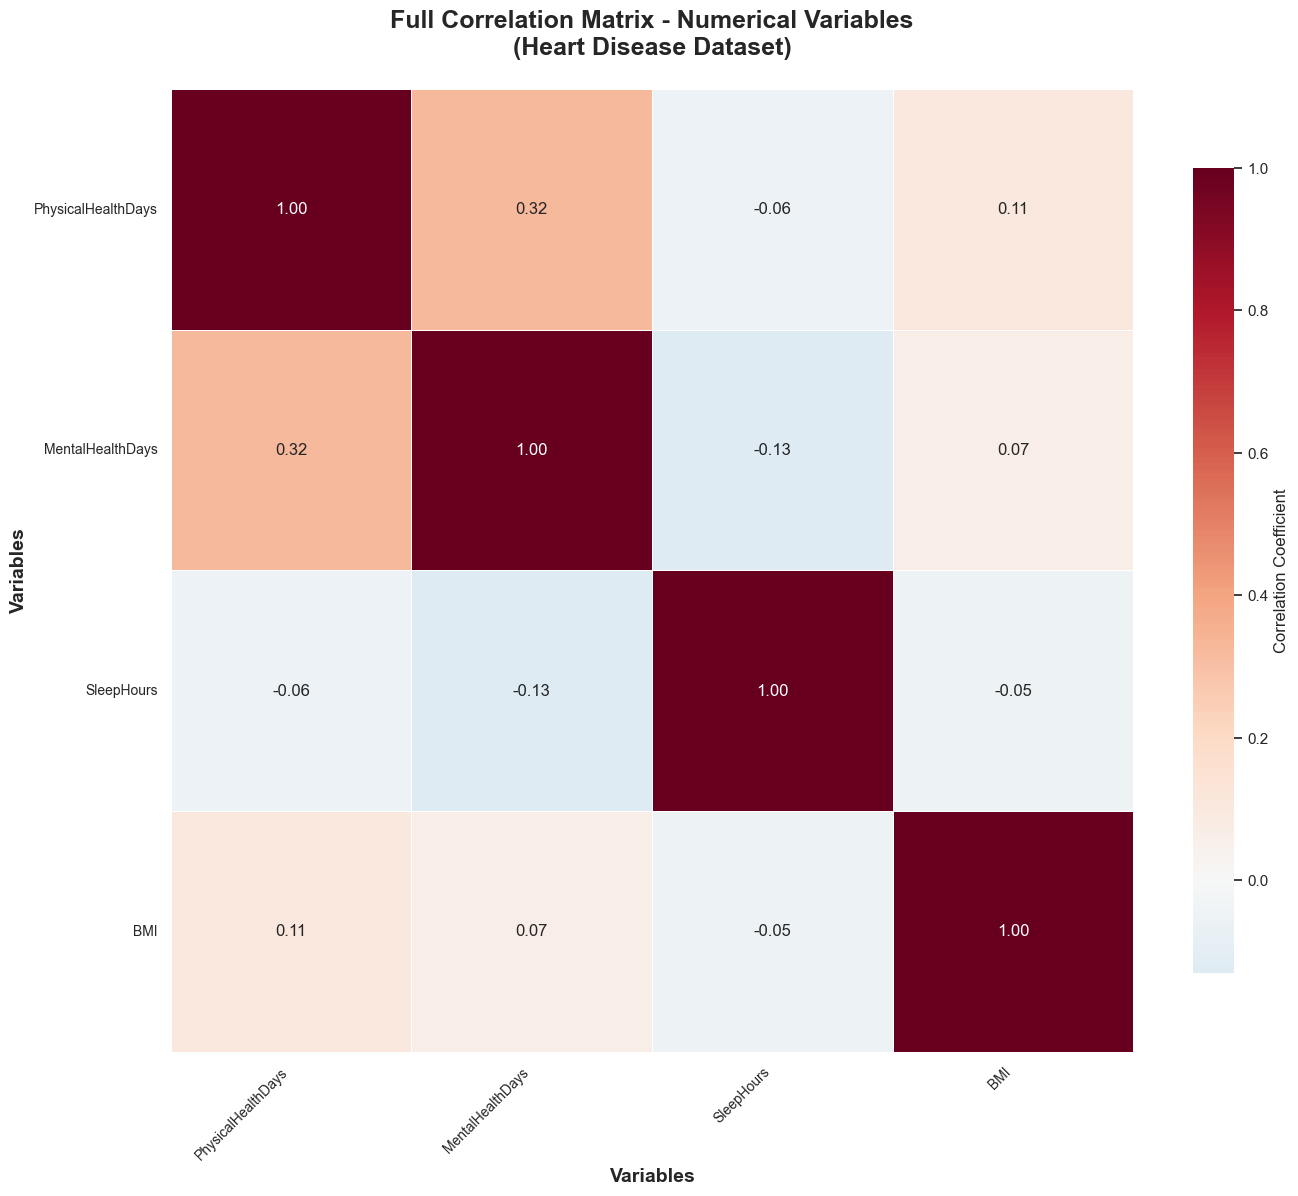

In [148]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap - Full matrix (no masking)
plt.figure(figsize=(14, 12))

# Create a beautiful heatmap with full correlation matrix
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5,
            linecolor='white',
            cbar_kws={
                'label': 'Correlation Coefficient',
                'shrink': 0.8,
                'aspect': 20
            })

plt.title('Full Correlation Matrix - Numerical Variables\n(Heart Disease Dataset)', 
          fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Variables', fontsize=14, fontweight='bold')
plt.ylabel('Variables', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

- Identify strongly correlated pairs (positive or negative) 
- Are there any surprising relationships? 

Based on the correlation matrix provided, here is an analysis of the relationships between the numerical variables.

### 1. Identification of Correlated Pairs

It is important to note first that **none of the correlations in this matrix are statistically "strong"** (typically defined as a coefficient above 0.7 or below -0.7). The variables appear to be largely independent of one another. However, we can highlight the *strongest relative* relationships:

* **PhysicalHealthDays & MentalHealthDays (Correlation: 0.32)**
* **Type:** Moderate Positive Correlation.
* **Analysis:** This is the most significant relationship in the chart. It indicates a link between physical and mental well-being; individuals who report more days of poor physical health tend to also report more days of poor mental health.


* **MentalHealthDays & SleepHours (Correlation: -0.13)**
* **Type:** Weak Negative Correlation.
* **Analysis:** There is a slight inverse relationship here. As sleep hours increase, the number of reported "bad" mental health days decreases slightly. Conversely, lack of sleep is weakly associated with more frequent mental distress.


* **PhysicalHealthDays & BMI (Correlation: 0.11)**
* **Type:** Weak Positive Correlation.
* **Analysis:** There is a very slight tendency for individuals with a higher BMI to report more days of poor physical health, but the relationship is quite weak.



---

### 2. Surprising Relationships

The most surprising aspect of this matrix is arguably what is **missing**—the correlations are generally much weaker than one might intuitively expect for health-related data.

* **The Disconnect Between Sleep and BMI (-0.05)**
* **Why it's surprising:** Medical literature often cites a strong link between sleep deprivation and weight gain (higher BMI).
* **The Data:** A correlation of **-0.05** is effectively zero. This suggests that, within this specific dataset, knowing someone's sleep schedule gives you almost no information about their BMI.


* **BMI is a Poor Predictor of "Feeling" Unhealthy (0.11)**
* **Why it's surprising:** One might assume that as BMI reaches obese levels, reported days of poor physical health would skyrocket.
* **The Data:** A correlation of only **0.11** implies that BMI is not a strong linear driver of how many days a person *feels* physically unwell. Many people with high BMI likely report feeling physically fine, or many with low BMI report feeling unwell, diluting the correlation.


* **Sleep Impact on Physical Health (-0.06)**
* **Why it's surprising:** Rest is essential for physical recovery.
* **The Data:** The correlation is negligible. Variable sleep patterns (within the range captured here) do not seem to linearly affect the number of days a person feels physically ill.


Cross-tabulations: 
• For important categorical × categorical combinations, create frequency tables  
• For numerical × categorical combinations, create grouped summary statistics 

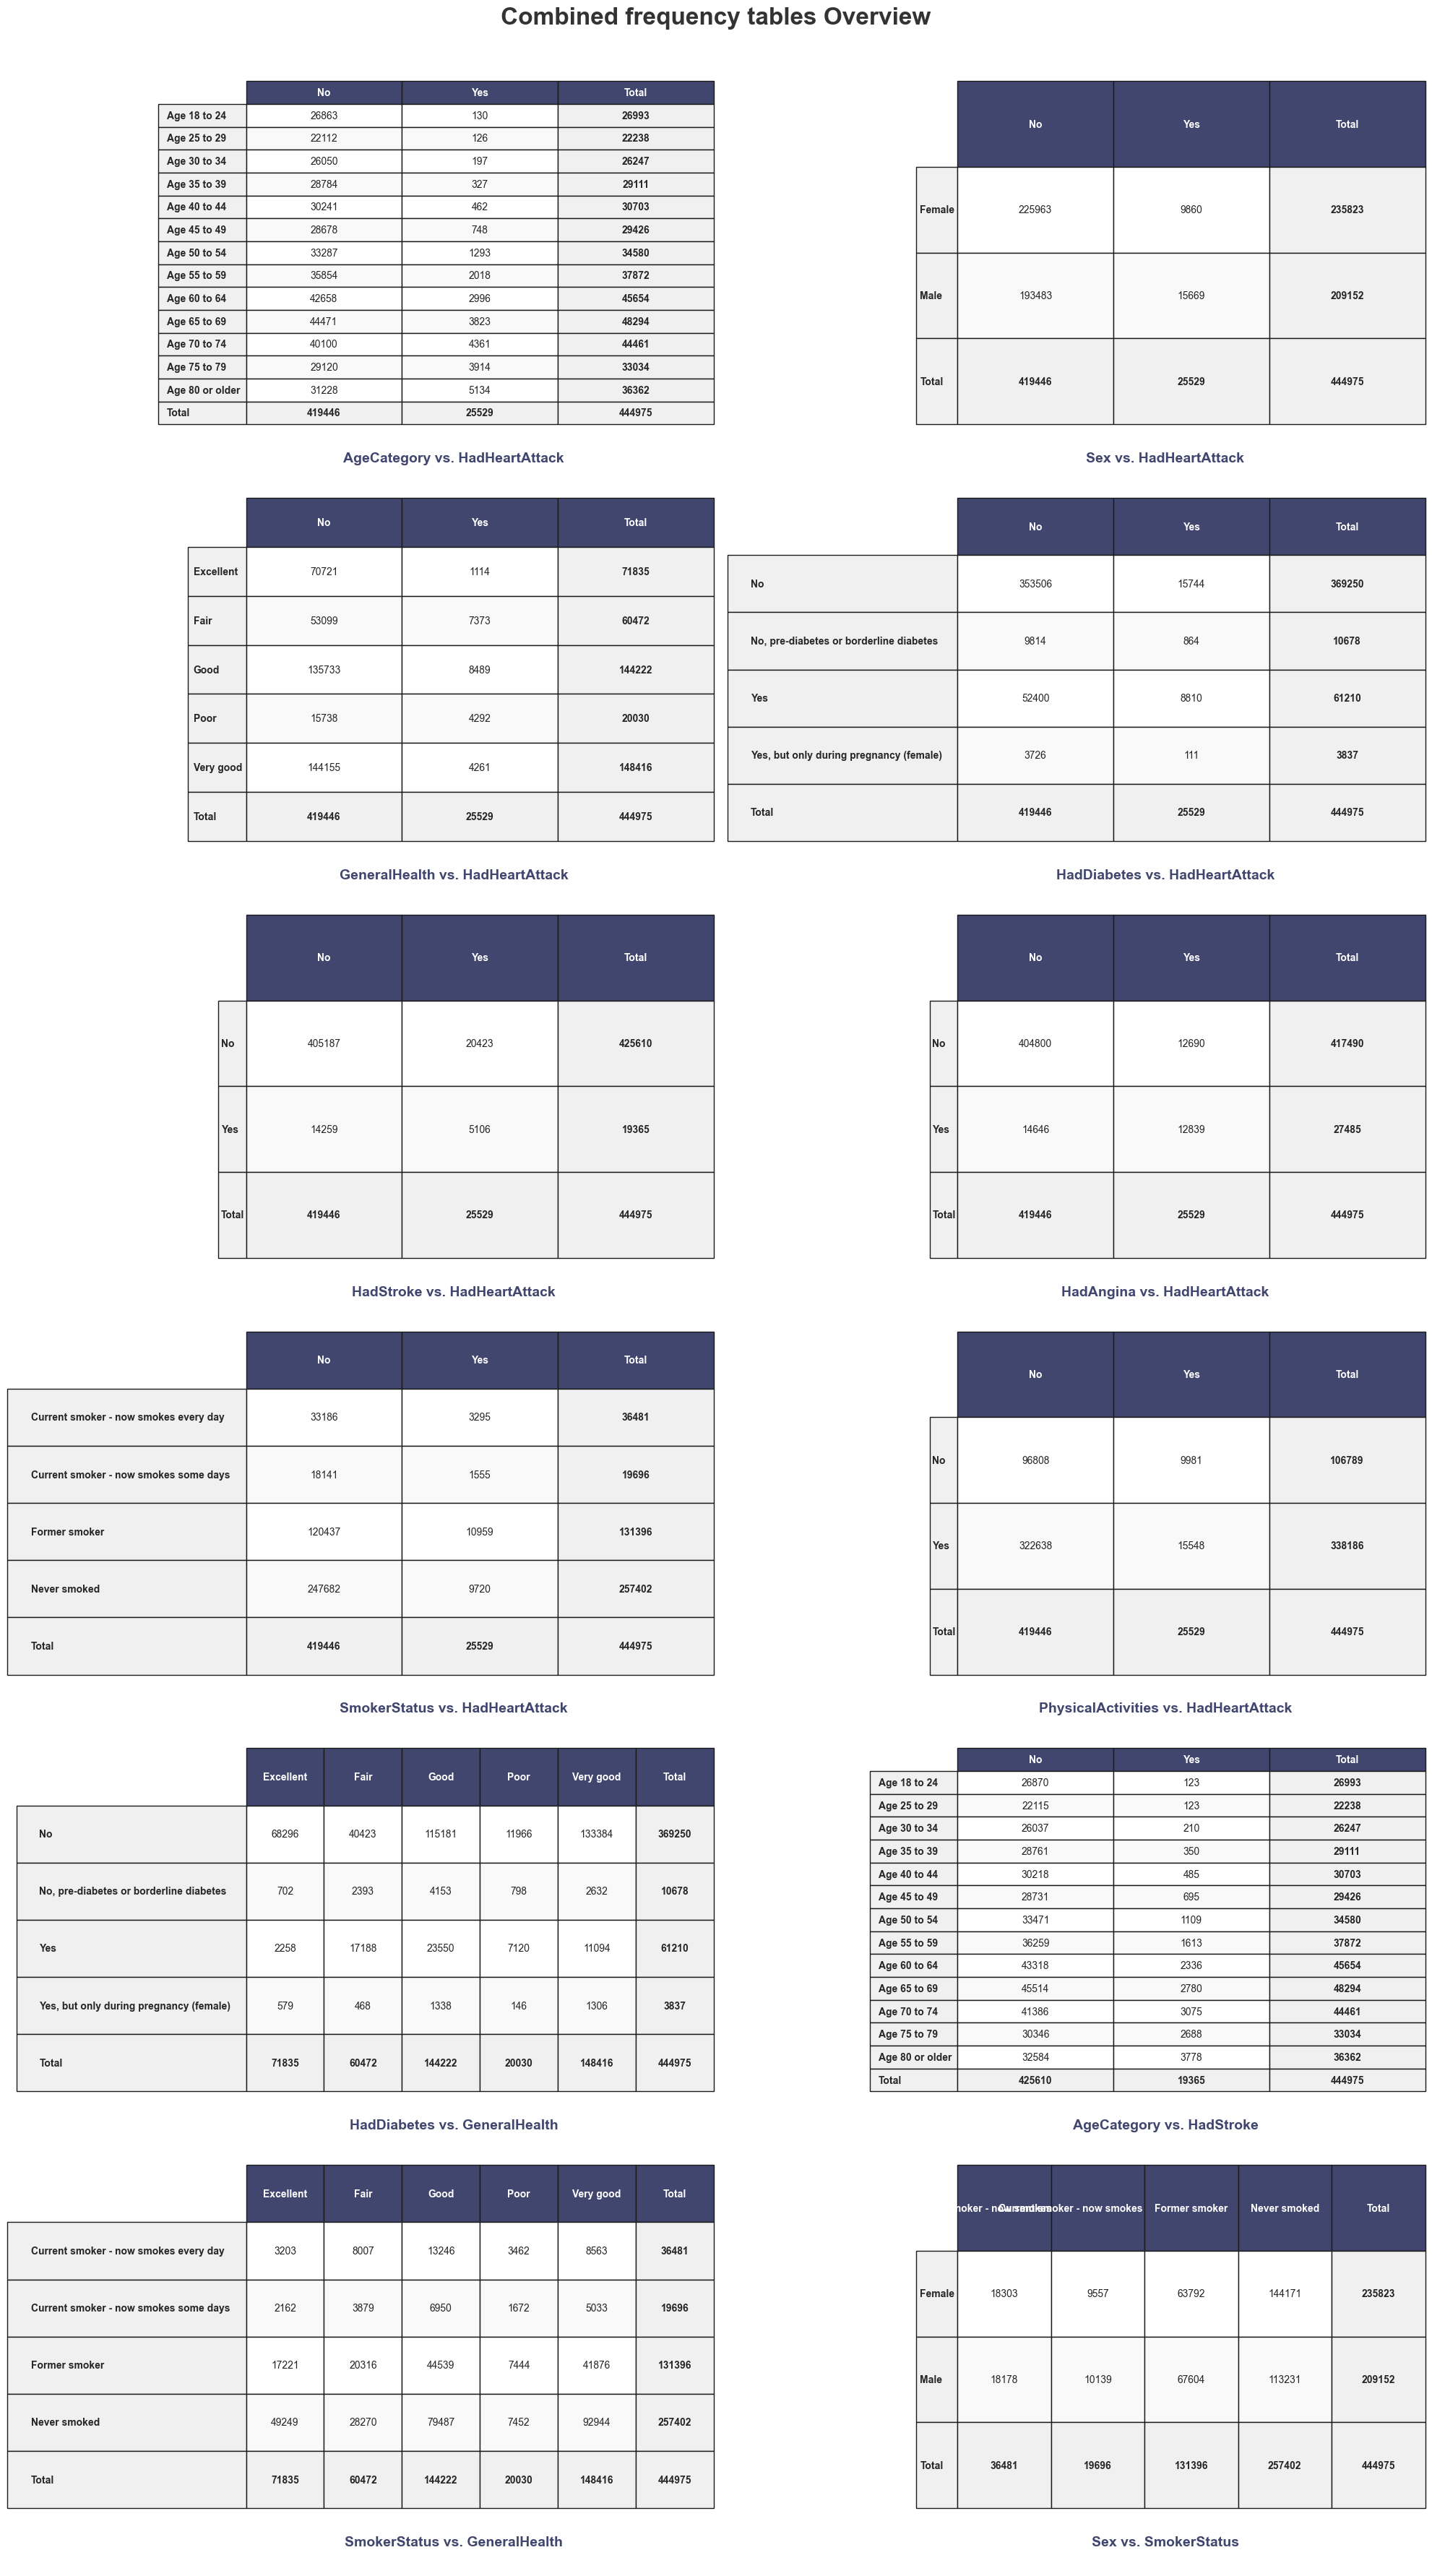

In [149]:
important_combinations = [
    # Demographics & Heart Attack
    ('AgeCategory', 'HadHeartAttack'),
    ('Sex', 'HadHeartAttack'),
    
    # Health Status & Heart Attack
    ('GeneralHealth', 'HadHeartAttack'),
    ('HadDiabetes', 'HadHeartAttack'),
    ('HadStroke', 'HadHeartAttack'),
    ('HadAngina', 'HadHeartAttack'), # Added: Angina is highly related
    
    # Lifestyle & Heart Attack
    ('SmokerStatus', 'HadHeartAttack'), # Added: Smoking is a major risk
    ('PhysicalActivities', 'HadHeartAttack'),
    
    # Relationships between Risk Factors (Comorbidity/Demographics)
    ('HadDiabetes', 'GeneralHealth'),   # Do diabetics feel unhealthier?
    ('AgeCategory', 'HadStroke'),       # Stroke risk by age
    ('SmokerStatus', 'GeneralHealth'),  # Smoking impact on perceived health
    ('Sex', 'SmokerStatus')             # Gender differences in smoking
]

def plot_frequency_tables(df, combinations, n_cols=2):
    n_plots = len(combinations)
    n_rows = math.ceil(n_plots / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
    axes = axes.flatten() 
    
    plt.suptitle('Combined frequency tables Overview', fontsize=24, fontweight='bold', y=0.99, color='#333')
    for i, (var1, var2) in enumerate(combinations):
        ax = axes[i]
        
        if var1 not in df.columns or var2 not in df.columns:
            continue
            
        freq_table = pd.crosstab(df[var1], df[var2], margins=True, margins_name='Total')
        
        # 2. Hide Axes
        ax.axis('off')

        table_obj = ax.table(
            cellText=freq_table.values,
            colLabels=freq_table.columns,
            rowLabels=freq_table.index,
            cellLoc='center',
            loc='center',
            bbox=[0.1, 0.15, 0.9, 0.85] 
        )

        table_obj.auto_set_font_size(False)
        table_obj.set_fontsize(10)
        
        rows, cols = freq_table.shape
        
        for (r, c), cell in table_obj.get_celld().items():
            cell.set_height(0.08)
            
            if r == 0:
                cell.set_text_props(weight='bold', color='white')
                cell.set_facecolor('#40466e')
            
            elif c == -1 or 'Total' in str(freq_table.index[r-1]) or (c == cols-1):
                cell.set_text_props(weight='bold')
                cell.set_facecolor('#f0f0f0')
            

            elif r > 0 and r < rows:
                if r % 2 == 0:
                    cell.set_facecolor('#f9f9f9')

        ax.text(0.5, 0.05, f'{var1} vs. {var2}', 
                transform=ax.transAxes, 
                ha='center', va='bottom', 
                fontsize=14, fontweight='bold', color='#40466e')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

plot_frequency_tables(df, important_combinations, n_cols=2)


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'HadHeartAttack'


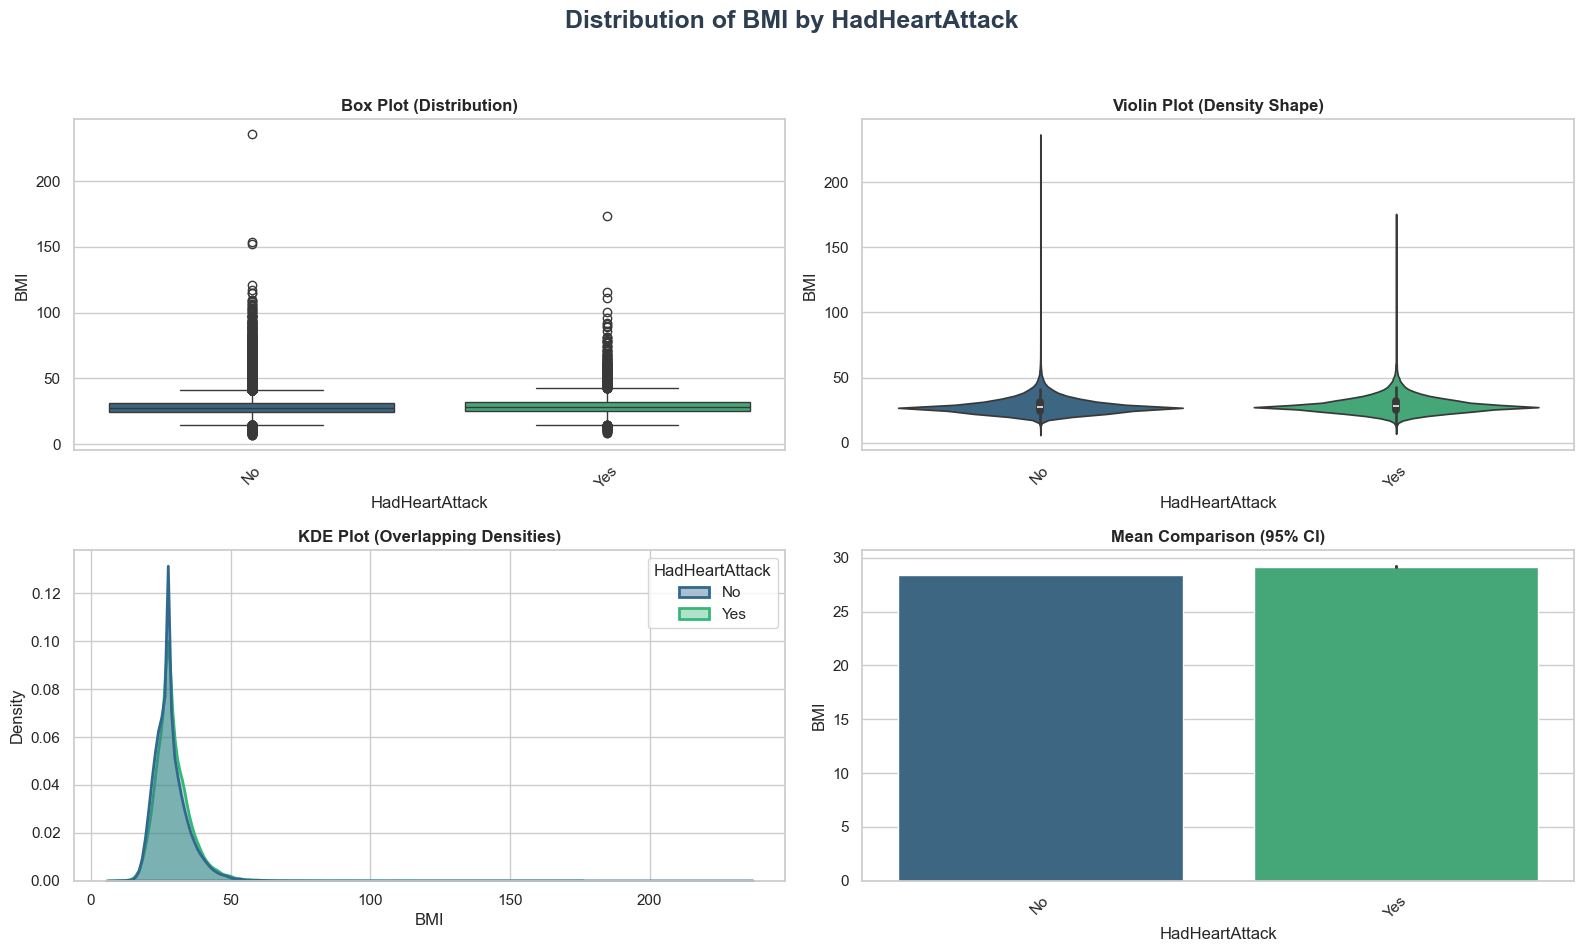


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'Sex'


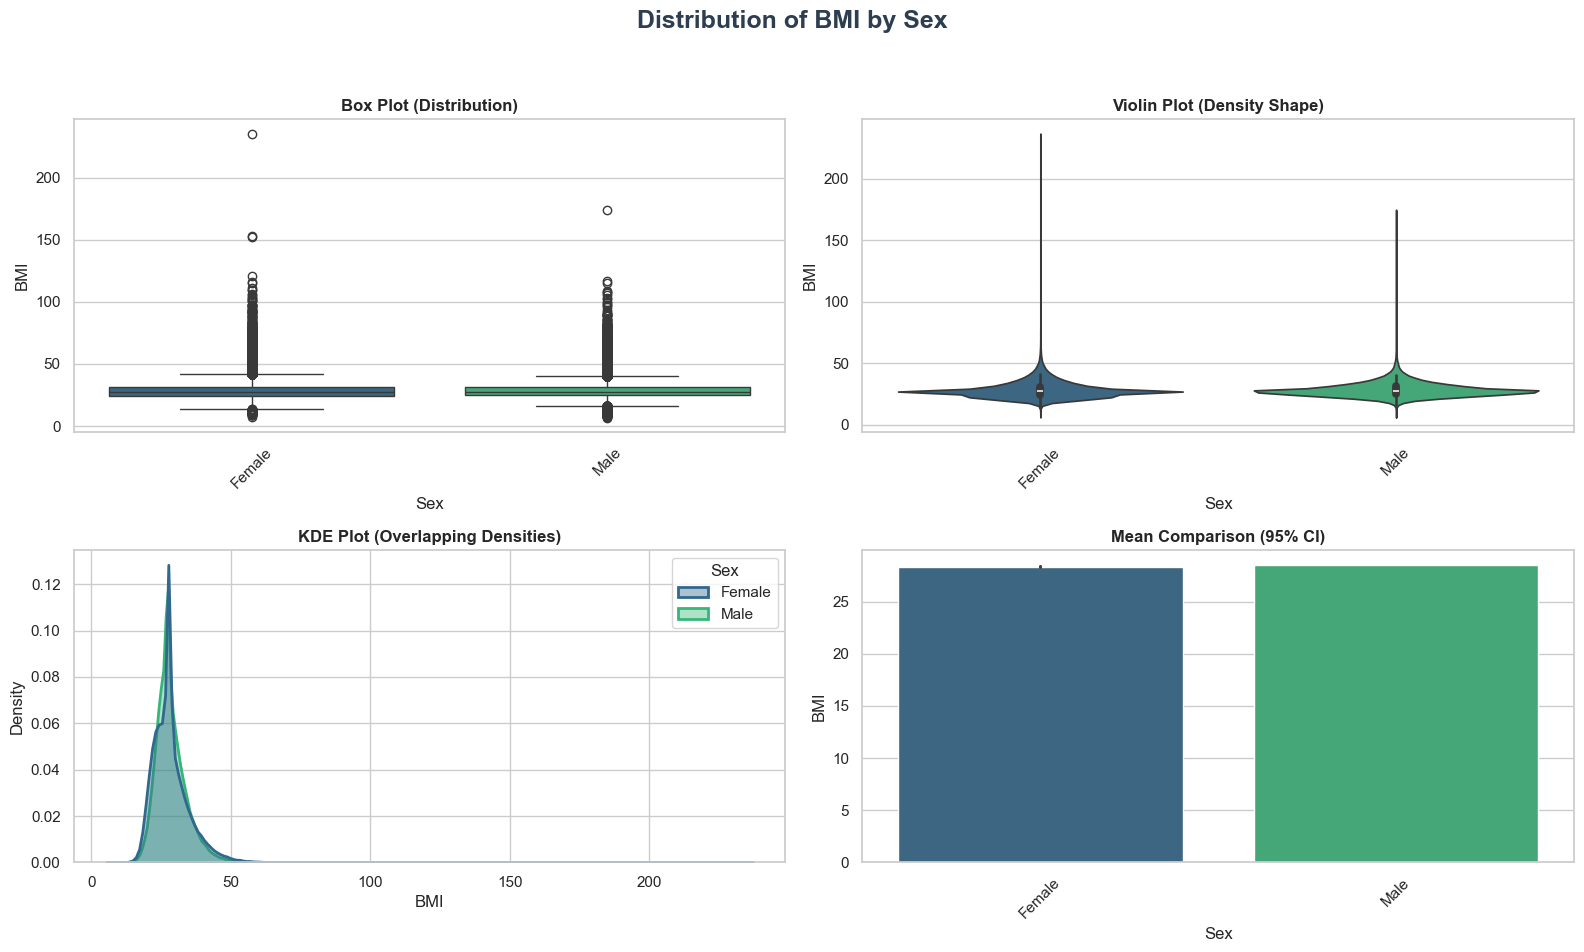


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'AgeCategory'


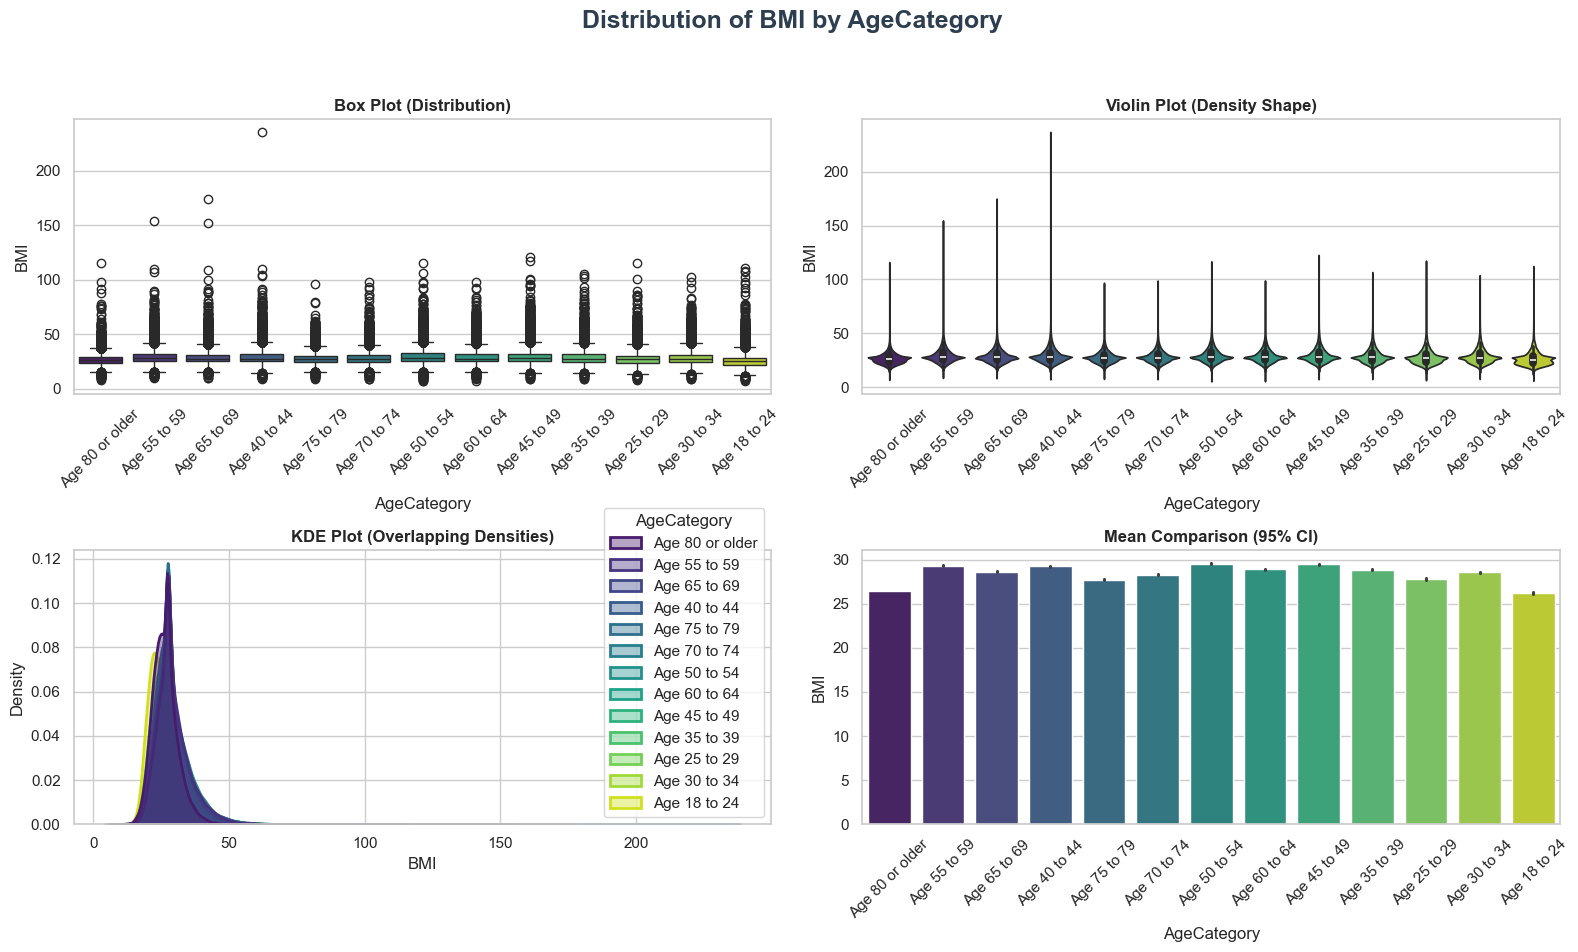


Analyzing Numerical Variable: 'BMI' by Categorical Variable: 'GeneralHealth'


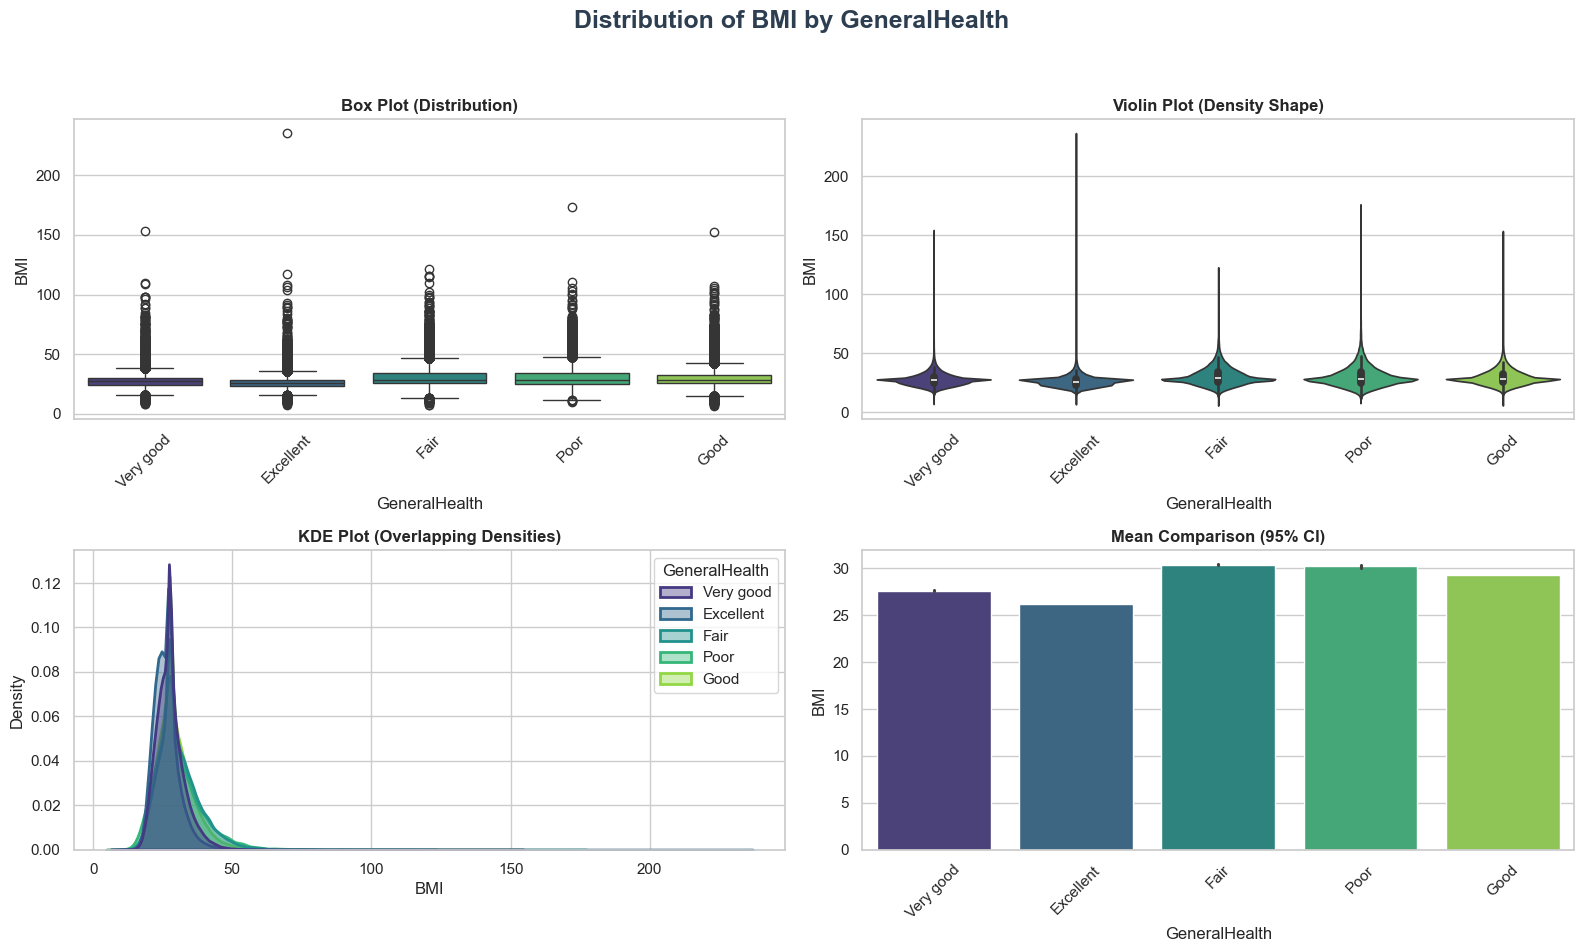


Analyzing Numerical Variable: 'PhysicalHealthDays' by Categorical Variable: 'HadHeartAttack'


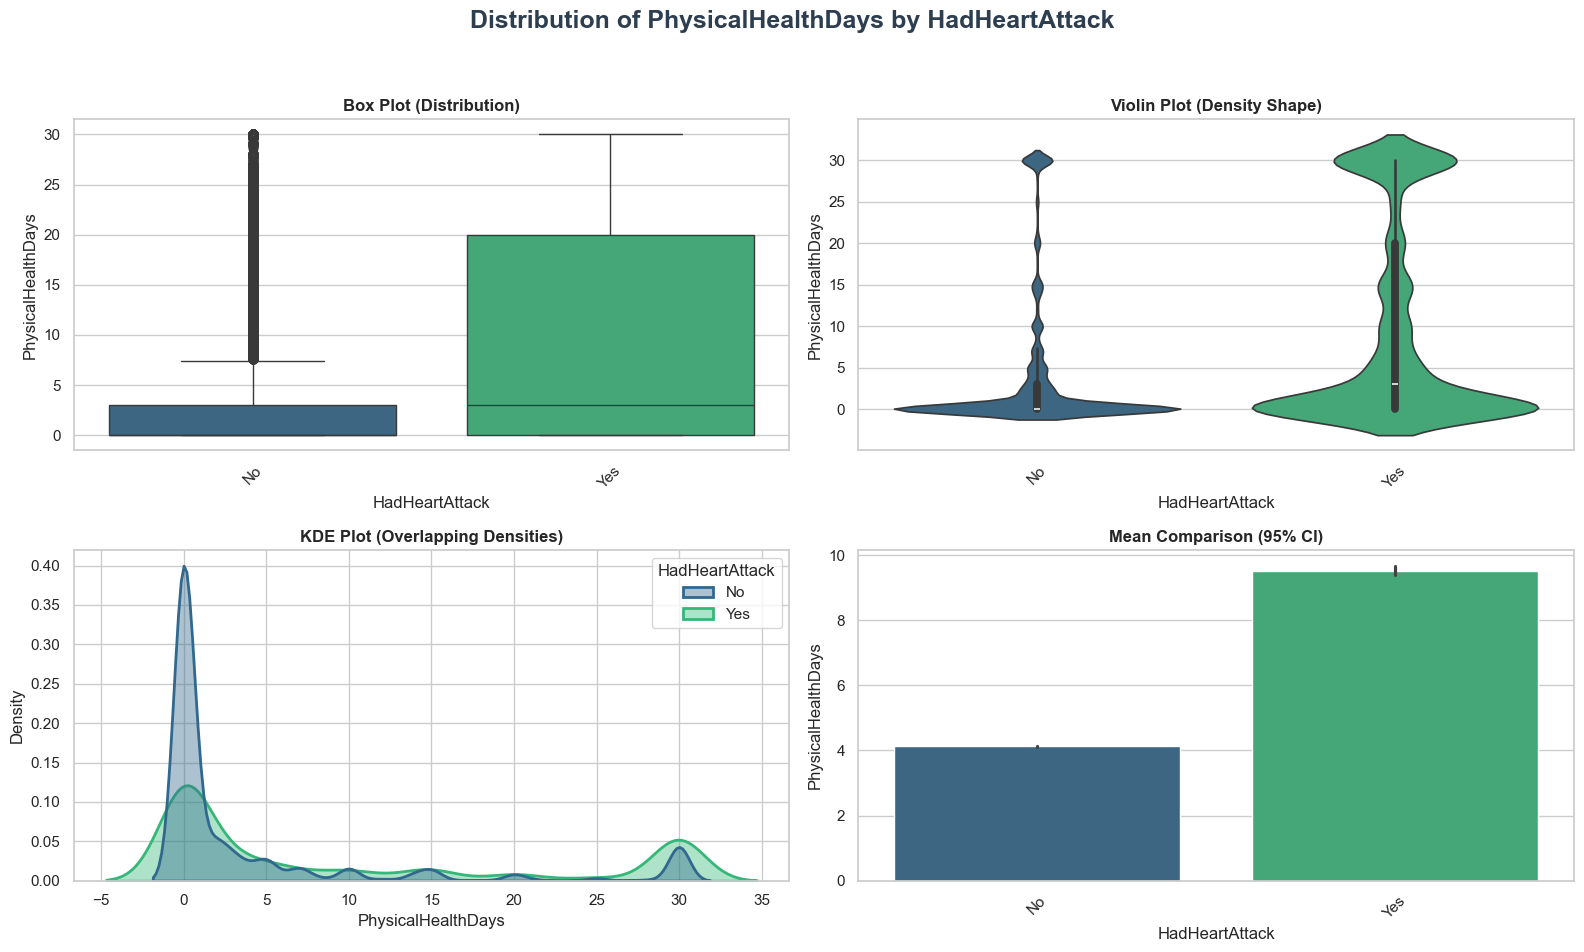


Analyzing Numerical Variable: 'PhysicalHealthDays' by Categorical Variable: 'GeneralHealth'


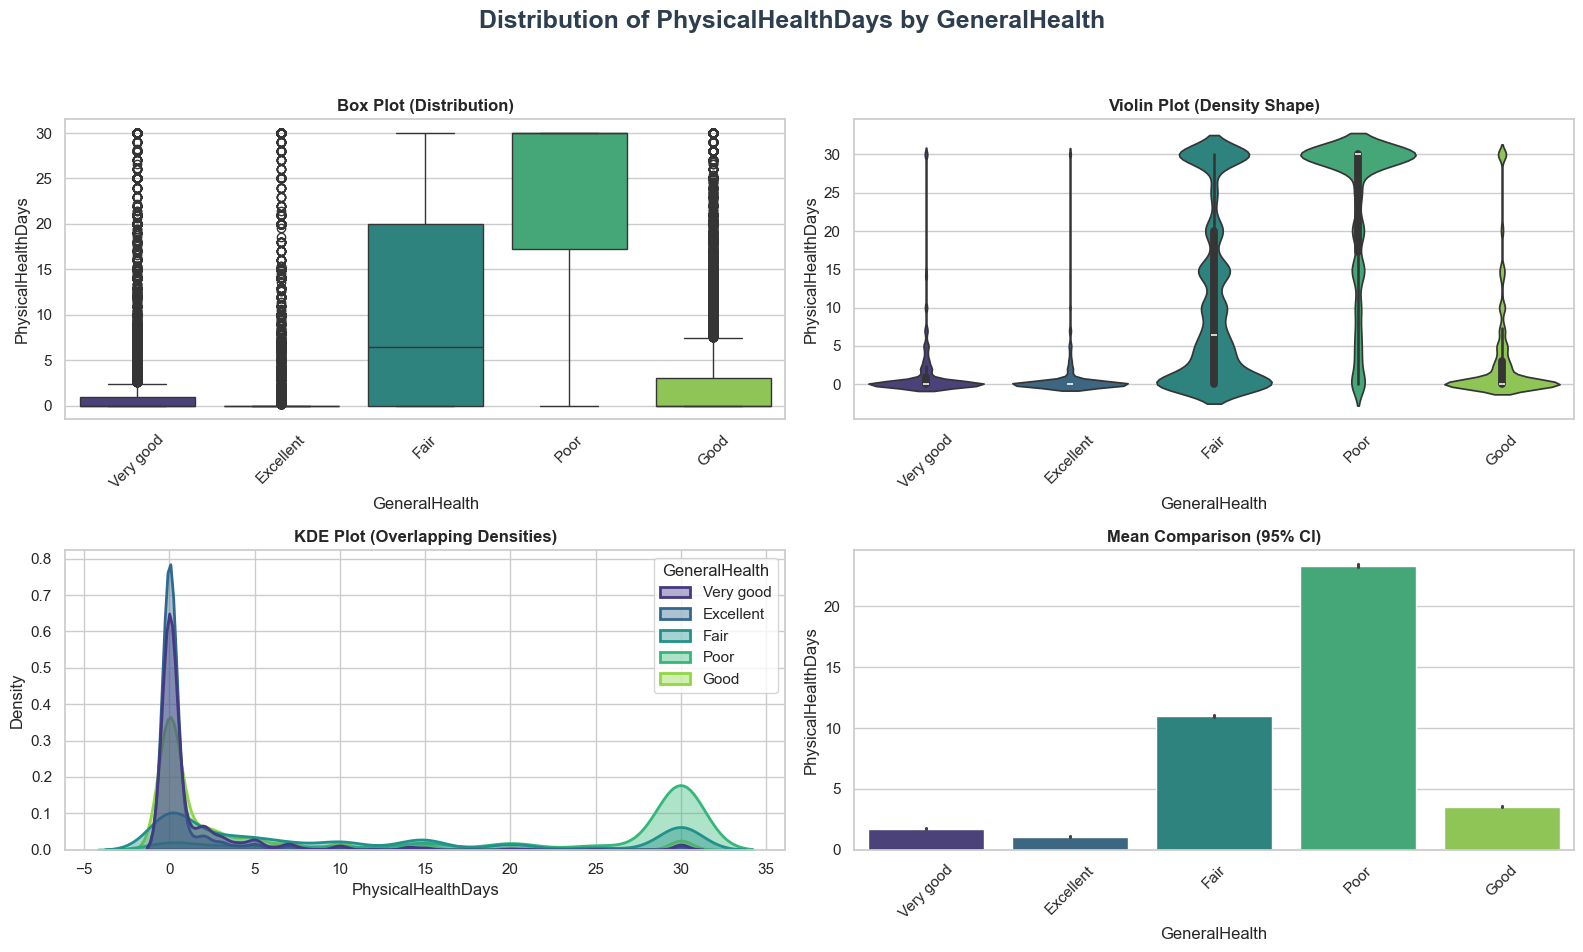


Analyzing Numerical Variable: 'MentalHealthDays' by Categorical Variable: 'HadHeartAttack'


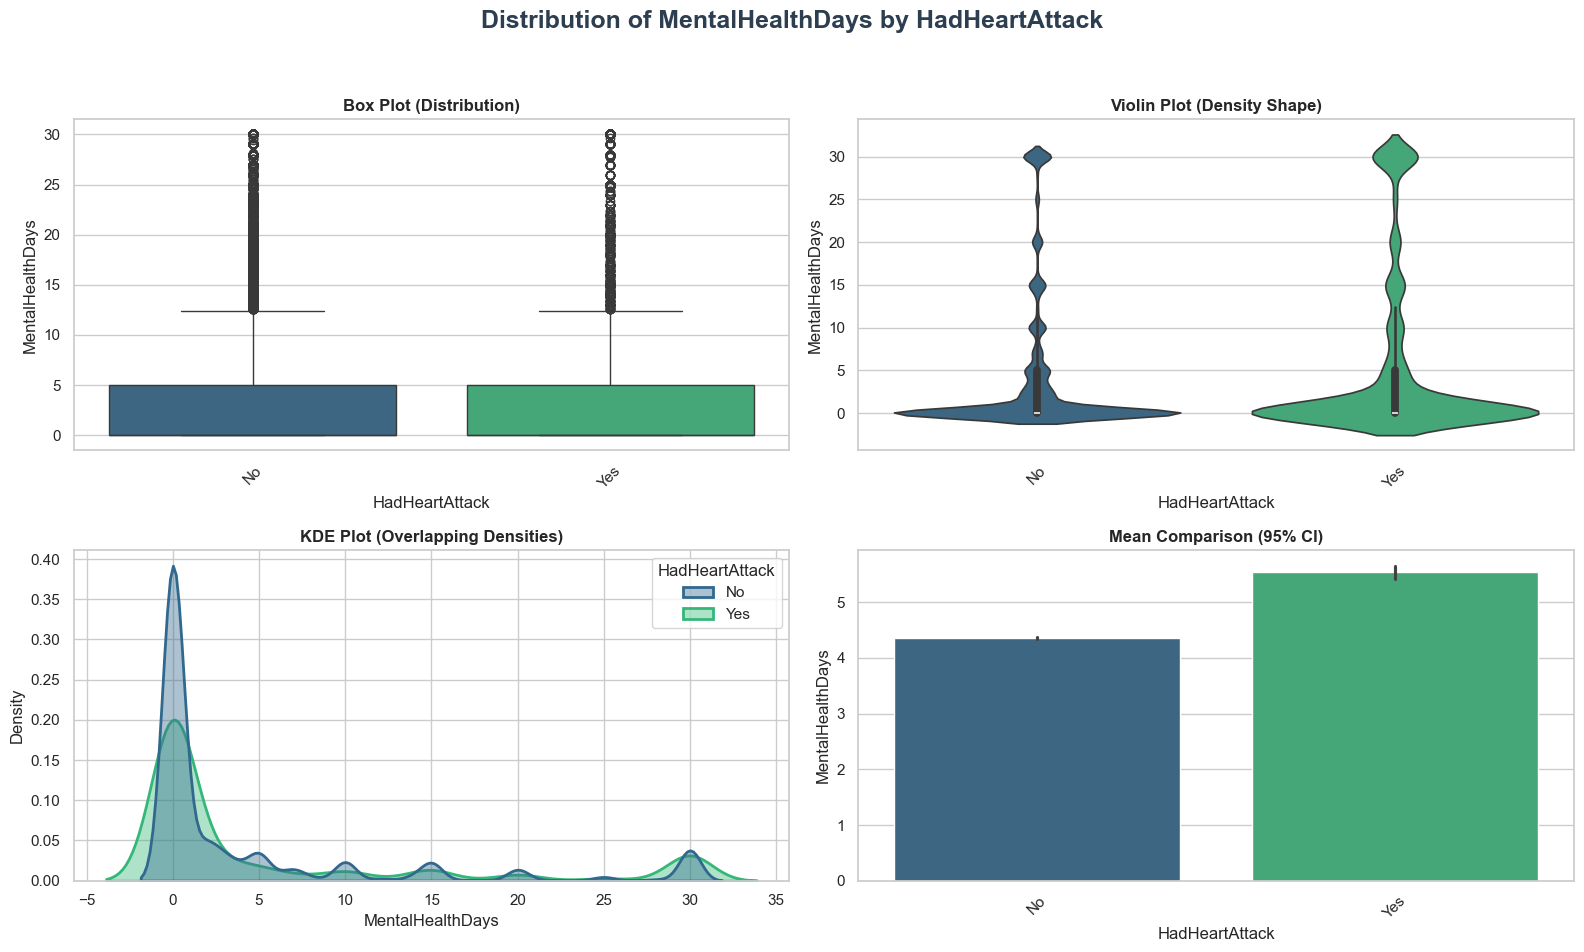


Analyzing Numerical Variable: 'MentalHealthDays' by Categorical Variable: 'Sex'


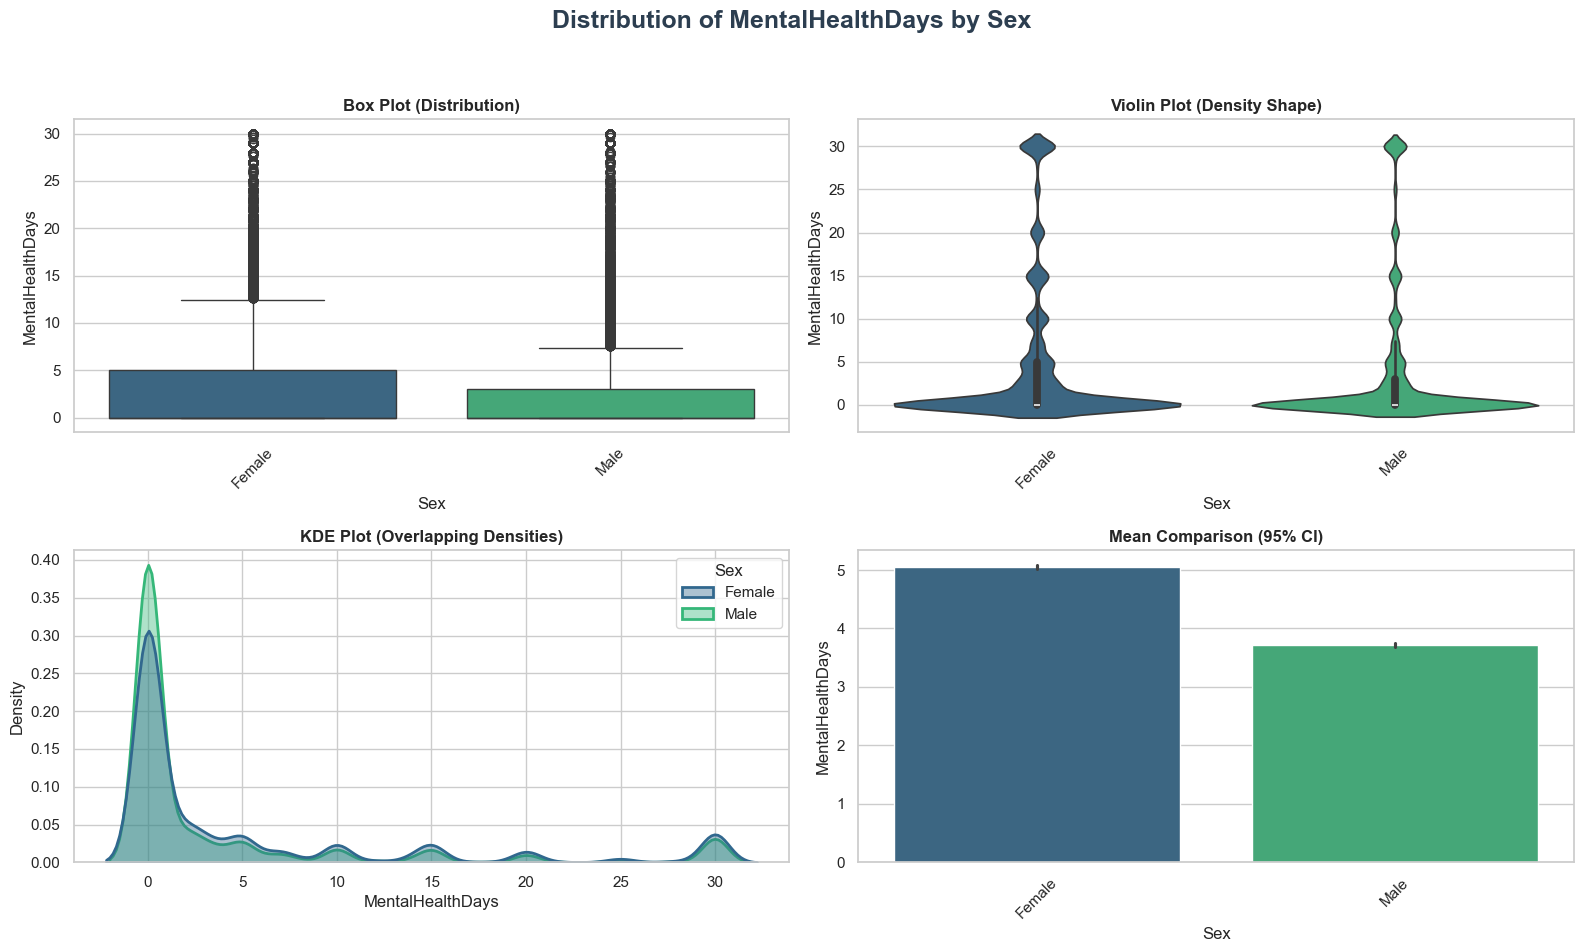


Analyzing Numerical Variable: 'SleepHours' by Categorical Variable: 'HadHeartAttack'


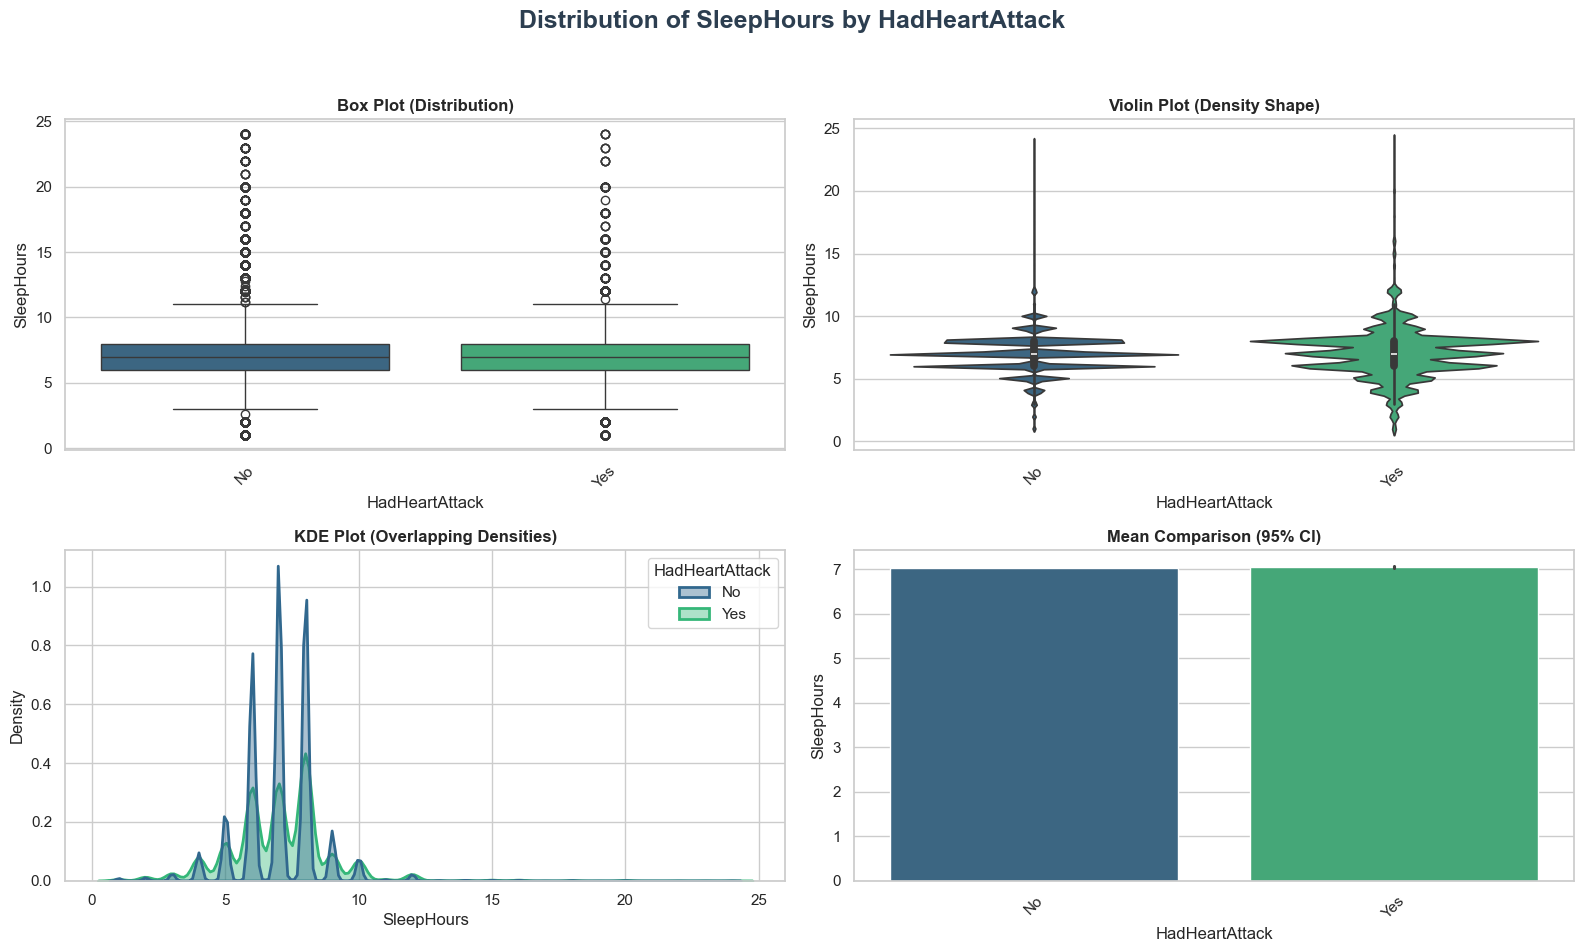


Analyzing Numerical Variable: 'SleepHours' by Categorical Variable: 'AgeCategory'


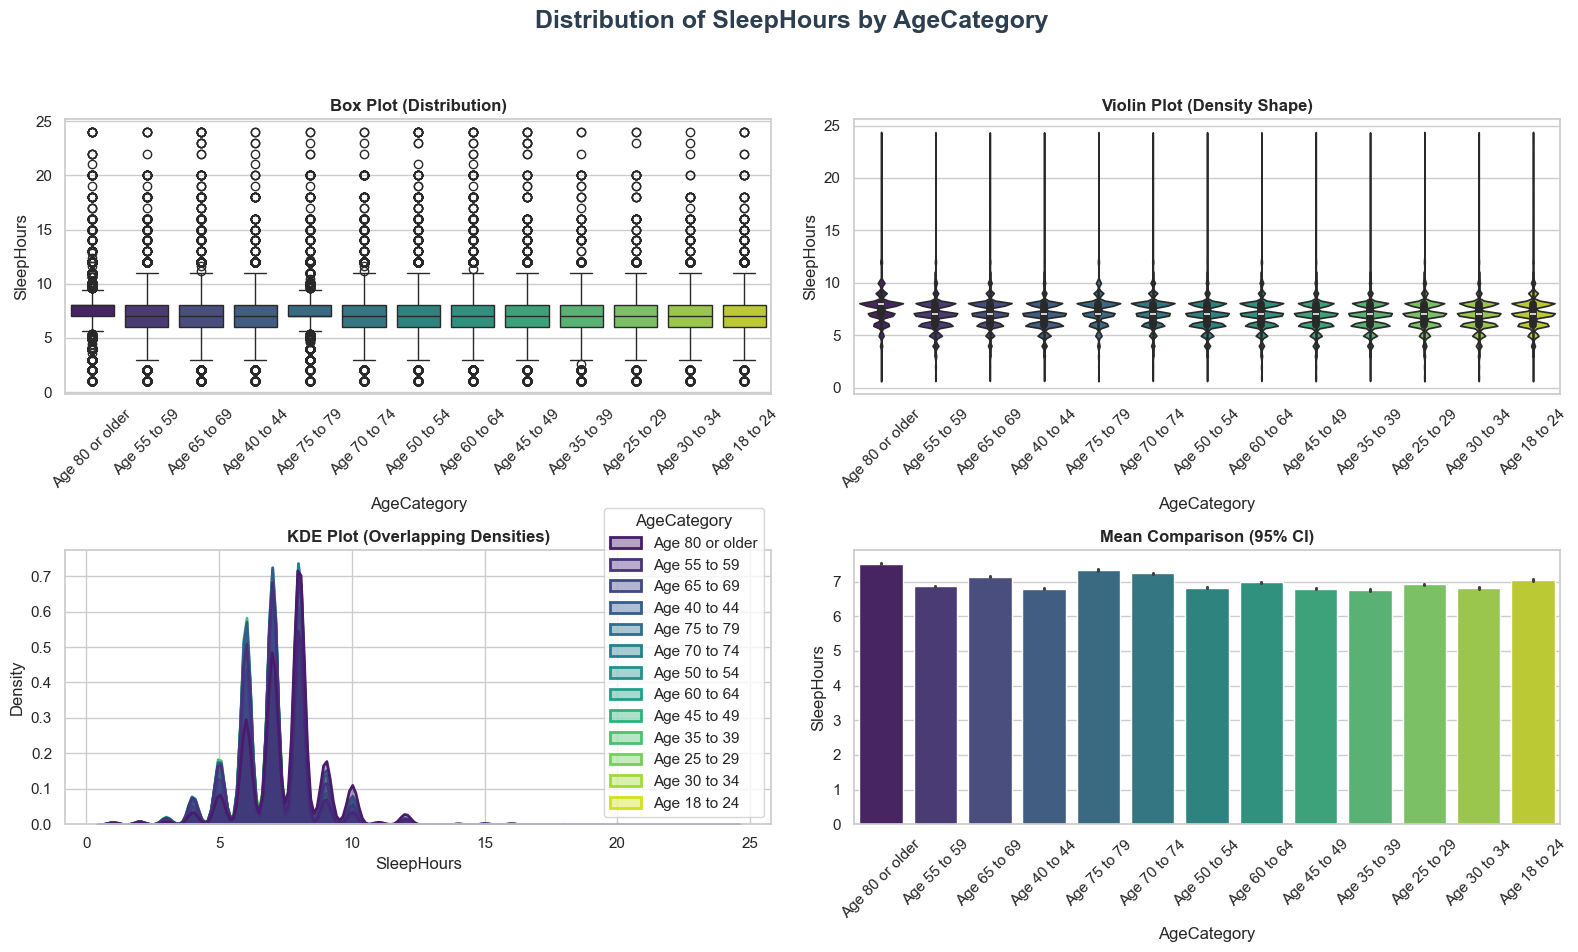

In [150]:
# Define important numerical × categorical combinations
numerical_categorical_combinations = [
    ('BMI', 'HadHeartAttack'),
    ('BMI', 'Sex'),
    ('BMI', 'AgeCategory'),
    ('BMI', 'GeneralHealth'),
    ('PhysicalHealthDays', 'HadHeartAttack'),
    ('PhysicalHealthDays', 'GeneralHealth'),
    ('MentalHealthDays', 'HadHeartAttack'),
    ('MentalHealthDays', 'Sex'),
    ('SleepHours', 'HadHeartAttack'),
    ('SleepHours', 'AgeCategory')
]

sns.set_theme(style="whitegrid")
pd.set_option('display.precision', 2)


def analyze_num_cat_colorful(df, num_var, cat_var):
    if num_var not in df.columns or cat_var not in df.columns:
        return

    print(f"\nAnalyzing Numerical Variable: '{num_var}' by Categorical Variable: '{cat_var}'")
    summary_df = df.groupby(cat_var)[num_var].agg(
        Count='count',
        Mean='mean',
        Median='median',
        Std='std',
        Min='min',
        Max='max',
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75)
    ).sort_values(by='Mean', ascending=False)
 
    styled_table = summary_df.style.set_properties(**{
            'background-color': '#f0f0f0', # Nền xám nhạt
            'color': 'black',              # Chữ đen
            'border-color': 'black',       # Viền đen
            'border-width': '1px',
            'border-style': 'solid'
        }).format("{:.2f}")
    display(styled_table)

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Distribution of {num_var} by {cat_var}', fontsize=18, fontweight='bold', color='#2c3e50')
    
   
    my_palette = "viridis" 
    
    # A. Box Plot
    sns.boxplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[0, 0], 
                palette=my_palette, legend=False)
    axes[0, 0].set_title('Box Plot (Distribution)', fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # B. Violin Plot
    sns.violinplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[0, 1], 
                   palette=my_palette, legend=False)
    axes[0, 1].set_title('Violin Plot (Density Shape)', fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # C. KDE Plot
    sns.kdeplot(data=df, x=num_var, hue=cat_var, ax=axes[1, 0], 
                fill=True, common_norm=False, palette=my_palette, alpha=0.4, linewidth=2)
    axes[1, 0].set_title('KDE Plot (Overlapping Densities)', fontweight='bold')
    
    
    sns.barplot(data=df, x=cat_var, y=num_var, hue=cat_var, ax=axes[1, 1], 
                palette=my_palette, errorbar=('ci', 95), legend=False)
    axes[1, 1].set_title('Mean Comparison (95% CI)', fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

for num, cat in numerical_categorical_combinations:
    analyze_num_cat_colorful(df, num, cat)

Summary: 

----

* **What are 3-5 key observations from your exploration?** 

### 1. Dataset is a conducted survey with a large number of records on various aspects related to Heart Disease 
The dataset is derived from the 2022 CDC BRFSS survey and is substantial in scale, containing over 400,000 observations. It offers significant feature diversity with more than 40 variables that cover seven distinct categorical groups, including Demographics, Heart Conditions, Physical Health, Chronic Conditions, Disabilities, Lifestyle, and Healthcare & Prevention. 

### 2. Data is moderately missing
Our dataset has approximately 15-25% of values missing across key variables. This issue does not appear to be random but rather systematic. To be more dpecific, patterns are evident in health screening variables (likely tied to healthcare access), sensitive health conditions (possibly due to privacy concerns), and lifestyle variables (suggesting survey fatigue). 

### 3. Most of the categorical columns are binary, which can be converted to boolean
The dataset is dominated by categorical variables, most of which are binary (Yes/No) or ordinal.

* **What data quality issues did you identify?** 

### **1. Strategic Missing Data & Bias**
A primary concern is the **non-random missingness** in healthcare access variables, where approximately 20-30% of the data is missing. This pattern correlates with socioeconomic status, creating a risk that the model may be biased toward healthier or more affluent populations. Additionally, **survey design effects** have introduced systematic bias; we observed higher missing rates and deteriorated data quality in questions asked later in the survey, suggesting respondent fatigue is affecting lifestyle and behavioral variables.

### **2. Categorical imbalance**
We identified significant **categorical imbalance**, particularly regarding specific health conditions. Several chronic conditions and disability types appear as "rare categories" with a prevalence of less than 5%. This scarcity of positive samples poses a challenge for reliable statistical inference and may require specialized resampling techniques to prevent the model from ignoring these minority classes.

### **3. Measurement Precision & Reliability**
The reliance on **self-reported data** introduces inherent biases, including potential inaccuracies in recalling events over extended periods and the "social desirability" bias, where sensitive health behaviors may be underreported.

### **4. Temporal Consistency**
Finally, there are moderate concerns regarding **temporal consistency**. Using a single-year snapshot may miss seasonal health variations, and there is a need to cross-validate findings with the 2020 dataset to ensure the observed patterns are stable over time and not specific to this reporting period.

* **What preprocessing steps will be necessary?**

#### 1. Missing Data Handling
* **Healthcare Variables:** Apply **Multiple Imputation** using demographic predictors (e.g., Age, Income) to statistically estimate missing values rather than dropping them.
* **Chronic Conditions:** Recode missing values into a specific **"Unknown/Not Diagnosed"** category, as a missing answer often indicates a lack of diagnosis rather than random data loss.
* **Lifestyle Variables:** Use **Group-wise Mode Imputation** (filling with the most frequent value) stratified by Age and Gender to ensure realistic estimates.
* **Validation:** Conduct **Complete Case Analysis** (removing all missing rows temporarily) as a sensitivity test to ensure our imputation methods did not introduce bias.

#### 2. Feature Encoding & Standardization
* **Binary Variables:** Map strict "Yes/No" fields directly to numeric **1/0**.
* **Ordinal Variables:** Apply **Ordinal Encoding** to variables with an inherent rank (e.g., General Health status, Age Brackets) to preserve their mathematical order.
* **Nominal Variables:** Use **One-Hot Encoding** for categories without rank (e.g., State, Race) to avoid creating false mathematical relationships between groups.
* **Uncertainty Handling:** Standardize all ambiguous responses (e.g., "Refused", "Don't Know") into a consistent format across the entire dataset before processing.

- What interesting patterns emerged that could lead to research questions? 

### 1. The "Compounding" Effect of Chronic Conditions
* The risk of a heart attack does not appear to increase linearly with each additional chronic condition. Instead, there is a sharp, non-linear spike in risk when a patient presents with a specific triad of comorbidities (e.g., Diabetes + Kidney Disease + Hypertension), particularly in younger age groups where these conditions are statistically rarer.

&rarr; This suggests that the *interaction* between diseases is more dangerous than the sum of their parts, prompting the need to quantify this "multimorbidity burden."

### 2. The Lifestyle-Resilience Paradox
* A subset of the data reveals individuals reporting high levels of mental distress and poor sleep quality (high risk) who surprisingly do *not* exhibit heart disease. Preliminary visual inspection suggests these "resilient" individuals share a common trait: high levels of physical activity.

&rarr; This anomaly indicates a potential "buffering effect" of exercise against psychological stress, driving the investigation into how physical activity mitigates the risks of poor sleep and mental health.

### 3. The Low-BMI / High-Risk Anomaly
* While high BMI is traditionally linked to heart disease, the correlation matrix shows a weaker-than-expected direct link. Conversely, variables like `AgeCategory`, `Sex`, and `GeneralHealth` show stronger predictive power. Furthermore, there are many cases of "normal weight" individuals suffering heart attacks.

&rarr; This counter-intuitive finding suggests that relying on BMI alone is insufficient. It necessitates a machine learning approach to uncover non-linear relationships and identify which non-invasive factors (like Age or Smoking) are actually the strongest predictors of risk.

### 4. Distinct Patient Archetypes
* The data does not show a uniform distribution of risk. Instead, patients seem to clump into distinct "profiles"—for example, a cluster of young, active smokers versus a cluster of elderly, sedentary non-smokers.

&rarr; This natural segmentation indicates that "heart disease patients" are not a monolith. It drives the need for Unsupervised Learning to discover these hidden latent groups (phenotypes) to tailor health interventions more effectively.

### **Part 1: Serious Data Quality Concerns**

**Survivorship Bias**
The most critical red flag in this dataset is survivorship bias. By design, the survey can only include living respondents, meaning those who have already died from severe heart disease are systematically excluded. This inevitably leads to an underestimation of disease severity and mortality risk, as the "worst-case" scenarios are missing from the data. To mitigate this, findings should be contextualized as applying to the *surviving* population, and where possible, compared against external mortality databases.

**Selection Bias in Participation**
Survey data often suffers from selection bias, where healthier, wealthier, or more educated individuals are more likely to participate than marginalized groups. This skew results in an underestimation of true disease prevalence and risk factors, as high-risk populations (often those with lower income or less access to healthcare) may be underrepresented. Evidence of this can be seen in higher missing data rates among lower-income demographic groups within the dataset.

**Self-Report Accuracy and Misclassification**
Because the data relies on self-reported diagnoses without clinical validation, there is a significant risk of misclassification for both predictors and outcomes. Participants may not accurately recall their medical history, or they may be unaware of their conditions. A major risk here is that undiagnosed conditions are effectively coded as "No" (absence of disease) rather than "Unknown," potentially diluting the strength of the correlations found in the analysis.

**Missing Data Dependencies (Informative Missingness)**
Missing data in health surveys is rarely random; the absence of information can be predictive in itself. For example, a patient might skip a question about alcohol consumption due to social stigma, or miss a question about income due to privacy concerns. This "informative missingness" means that standard imputation methods (filling in blanks with averages) might violate statistical assumptions, and restricting the analysis only to complete cases could introduce further bias by ignoring a specific subset of the population.

---

### **Part 2: Limitations Affecting Analysis**

This section describes constraints related to the study design and statistical methodology that limit how the results can be interpreted or generalized.

**Constraints of Cross-Sectional Design**
The cross-sectional nature of the survey captures a snapshot in time, which inherently limits causal inference. We cannot establish a temporal sequence—for instance, we cannot definitively say whether a respondent became sedentary *before* developing heart disease or *because* of it. Consequently, the analysis can identify associations and correlations but cannot prove causality or track disease progression and severity over time.

**Statistical Power and Multiple Testing**
While the dataset is large, specific challenges remain regarding statistical power. For rare conditions or specific subgroups (e.g., young adults with multiple comorbidities), there may be insufficient data to draw robust conclusions. Conversely, the large overall sample size allows the detection of trivial effects that are statistically significant but clinically meaningless. Additionally, testing over 40 variables increases the risk of "false discoveries" (Type I errors), requiring careful statistical correction.

**Generalizability and Cultural Context**
The findings are specific to the United States and heavily influenced by the US healthcare system's access patterns. Therefore, the results may not be generalizable to international populations with different genetic backgrounds, lifestyle habits, or healthcare models. Furthermore, cultural factors can influence how different groups perceive and report health issues, potentially leading to varying patterns of self-reporting that the model cannot easily account for.

**Model Interpretability vs. Complexity**
There is a trade-off between building a highly accurate model and one that is clinically useful. Complex machine learning models might capture intricate interactions between variables but can become "black boxes" that are difficult to interpret. In a medical context, a model's clinical translation is vital; statistical significance does not always equal clinical significance, and overly complex models may be difficult to implement in real-world decision-making scenarios.